In [274]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime

In [275]:
df=pd.read_csv("/content/dataset_tk.csv")
df_long=pd.read_csv("/content/long_data_.csv")

In [276]:
df.isnull().sum()
df_long.isnull().sum()

States       0
Regions      0
latitude     0
longitude    0
Dates        0
Usage        0
dtype: int64

In [277]:
df.rename(columns={'Unnamed: 0':'Date'}, inplace=True)
df['Date']=pd.to_datetime(df['Date'])
df["year"]=df["Date"].dt.year
df["month"]=df["Date"].dt.month
df["day"]=df["Date"].dt.day
df.drop(["Date"],axis=1,inplace=True)
df_long.head()

,States,Regions,latitude,longitude,Dates,Usage
0,Punjab,NR,31.519974,75.980003,02/01/2019 00:00:00,119.9
1,Haryana,NR,28.450006,77.019991,02/01/2019 00:00:00,130.3
2,Rajasthan,NR,26.449999,74.639981,02/01/2019 00:00:00,234.1
3,Delhi,NR,28.669993,77.230004,02/01/2019 00:00:00,85.8
4,UP,NR,27.599981,78.050006,02/01/2019 00:00:00,313.9


In [278]:
df_long=pd.read_csv("/content/long_data_.csv")
df_long['Dates']=pd.to_datetime(df_long["Dates"],dayfirst=True)
df_long["year"]=df_long["Dates"].dt.year
df_long["month"]=df_long["Dates"].dt.month
df_long["day"]=df_long["Dates"].dt.day
#df_long.drop(["latitude","longitude","Dates"],axis=1,inplace=True)
df_long.tail(25)

,States,Regions,latitude,longitude,Dates,Usage,year,month,day
16574,Chandigarh,NR,30.719997,76.780006,2020-12-05,3.5,2020,12,5
16575,Chhattisgarh,WR,22.090420,82.159987,2020-12-05,102.4,2020,12,5
16576,Gujarat,WR,22.258700,71.192400,2020-12-05,362.5,2020,12,5
16577,MP,WR,21.300391,76.130019,2020-12-05,200.1,2020,12,5
16578,Maharashtra,WR,19.250232,73.160175,2020-12-05,470.5,2020,12,5
16579,Goa,WR,15.491997,73.818001,2020-12-05,12.0,2020,12,5
16580,DNH,WR,20.266578,73.016618,2020-12-05,18.4,2020,12,5
16581,Andhra Pradesh,SR,14.750429,78.570026,2020-12-05,181.9,2020,12,5
16582,Telangana,SR,18.112400,79.019300,2020-12-05,197.0,2020,12,5
16583,Karnataka,SR,12.570381,76.919997,2020-12-05,218.6,2020,12,5


In [279]:
c=dict()
for i in (df_long.Regions.unique()):
    a=df_long[(df_long["Regions"]==i)&(df_long["year"]==2020)]
    b=a.Usage.sum()
    c.update({i:b})
    
print(c)



d=dict()
for i in (df_long.Regions.unique()):
    a=df_long[(df_long["Regions"]==i)&(df_long["year"]==2019)]
    b=a.Usage.sum()
    d.update({i:b})

print(d)

Region_2020=pd.DataFrame.from_dict(c,orient="index")
Region_2019=pd.DataFrame.from_dict(d,orient="index")

{'NR': 147559.8, 'WR': 155089.3, 'SR': 137883.39999999997, 'ER': 46799.4, 'NER': 6190.7}
{'NR': 358694.8, 'WR': 385280.5, 'SR': 338795.20000000007, 'ER': 117915.1, 'NER': 15519.7}


In [280]:
Region_2020.rename(columns={0:"Total usages (2020)"},inplace=True)
Region_2019.rename(columns={0:"Total usages (2019)"},inplace=True)
Region_2019.head()

,Total usages (2019)
NR,358694.8
WR,385280.5
SR,338795.2
ER,117915.1
NER,15519.7


In [281]:
Region_2020.head()

,Total usages (2020)
NR,147559.8
WR,155089.3
SR,137883.4
ER,46799.4
NER,6190.7


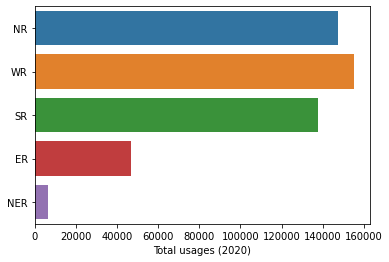

In [282]:
sns.barplot(x="Total usages (2020)",y=Region_2020.index,data=Region_2020)

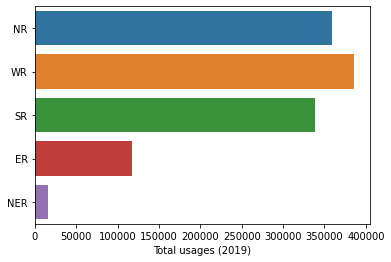

In [283]:
sns.barplot(x="Total usages (2019)",y=Region_2019.index,data=Region_2019)

In [284]:
usage_2020=dict()
for i in (df_long.States.unique()):
    a=df_long[(df_long["States"]==i)&(df_long["year"]==2020)]
    b=a.Usage.sum()
    usage_2020.update({i:b})

usage_2019=dict()
for i in (df_long.States.unique()):
    a=df_long[(df_long["States"]==i)&(df_long["year"]==2019)]
    b=a.Usage.sum()
    usage_2019.update({i:b})

In [285]:
table1=pd.DataFrame.from_dict(usage_2020,orient="index")
table2=pd.DataFrame.from_dict(usage_2019,orient="index")

In [286]:
table1.rename(columns={0:'Total usage in 2020'},inplace=True)
table2.rename(columns={0:'Total usage in 2019'},inplace=True)

In [287]:
table1.sort_values(by=['Total usage in 2020'],ascending=False,inplace=True)
table2.sort_values(by=['Total usage in 2019'],ascending=False,inplace=True)

In [288]:
table1.head()

,Total usage in 2020
Maharashtra,62163.1
Gujarat,47131.5
UP,45270.4
Tamil Nadu,44551.3
Rajasthan,31738.2


## **Top 10 States with most cosumption in the year 2019**

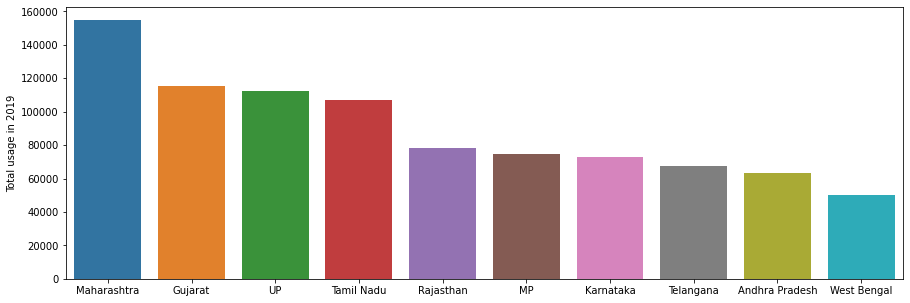

In [289]:
table3=table2.head(10)
plt.figure(figsize=(15, 5))
sns.barplot(y="Total usage in 2019",x=table3.index,data=table3)


# **Top 10 States with most cosumption in the year 2020**

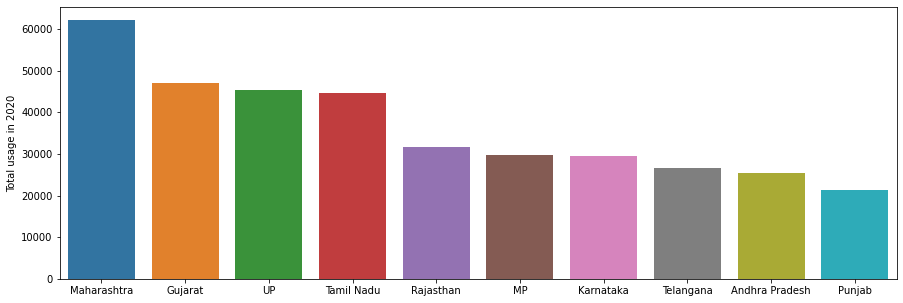

In [290]:
table4=table1.head(10)
plt.figure(figsize=(15, 5))
sns.barplot(y="Total usage in 2020",x=table4.index,data=table4)

# **States with low consumotion in year 2019**

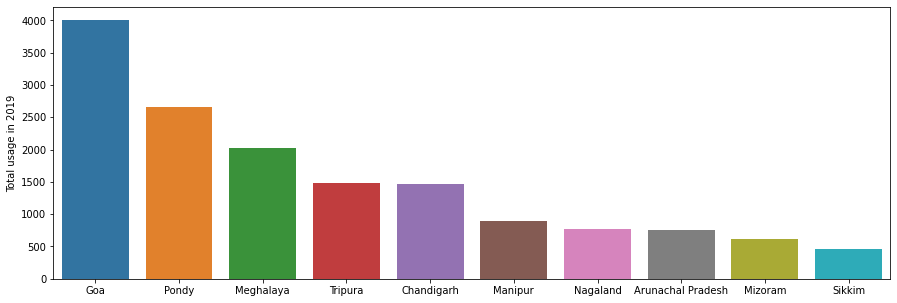

In [291]:
table5=table2.tail(10)
plt.figure(figsize=(15, 5))
sns.barplot(y="Total usage in 2019",x=table5.index,data=table5)

# **States with low consumotion in year 2019**

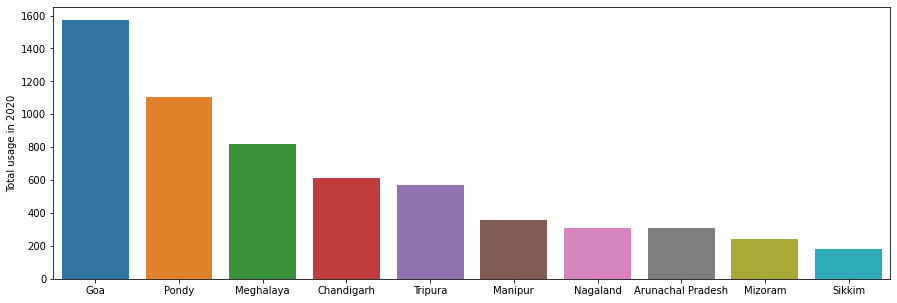

In [292]:
table6=table1.tail(10)
plt.figure(figsize=(15, 5))
sns.barplot(y="Total usage in 2020",x=table6.index,data=table6)

# **Overview of consumption in year 2019**

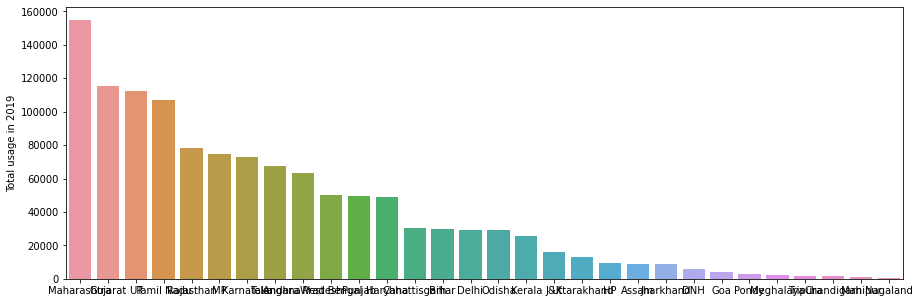

In [293]:
table5=table2.head(30)
plt.figure(figsize=(15, 5))
sns.barplot(y="Total usage in 2019",x=table5.index,data=table5)

# **Overview of consumption in year 2020**

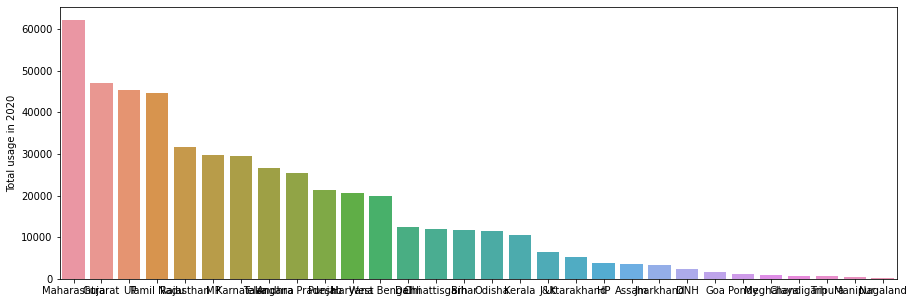

In [318]:
table6=table1.head(30)
plt.figure(figsize=(15, 5))
sns.barplot(y="Total usage in 2020",x=table6.index,data=table6)

# **Month wise Consumption**

In [294]:
month2020=dict()
for i in range(1,6):
    c=df_long[(df_long["month"]==i)&(df_long["year"]==2020)]
    d=c["Usage"].sum()
    month2020.update({i:d})

month2019=dict()
for i in range(1,13):
    c=df_long[(df_long["month"]==i)&(df_long["year"]==2019)]
    d=c["Usage"].sum()
    month2019.update({i:d})


In [295]:
month_2019=["jan","feb",'march',"april","may","june","july","aug","sep","oct","nov","dec"]
month_2020=["jan","feb",'march',"april","may"]

In [296]:
list1=list(month2019.values())
list2=list(month2020.values())

In [297]:
A=max(list1)
B=list1.index(A)
C=month_2019[B]
X=max(list2)
Y=list2.index(X)
Z=month_2020[Y]

In [298]:
print("The month in which consumption is More in 2019",C)
print("The month in which consumption is More in 2020",Z)

The month in which consumption is More in 2019 july
The month in which consumption is More in 2020 jan


# **Month wise comsumption in 2019**

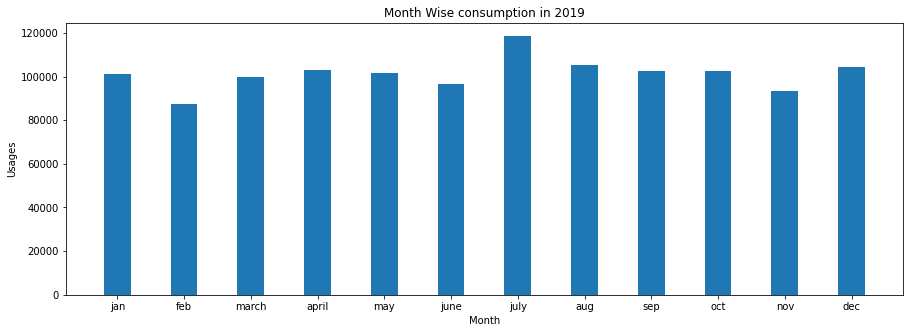

In [299]:
plt.figure(figsize = (15, 5))
plt.bar(month_2019,list1,width = 0.4)
 
plt.ylabel("Usages")
plt.xlabel("Month")
plt.title("Month Wise consumption in 2019")
plt.show()

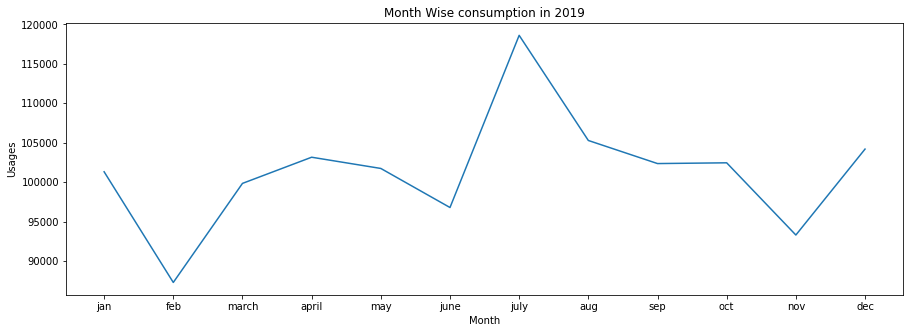

In [300]:
plt.figure(figsize = (15, 5))
plt.plot(month_2019,list1)
 
plt.ylabel("Usages")
plt.xlabel("Month")
plt.title("Month Wise consumption in 2019")
plt.show()

# **Month wise consumption in 2020**

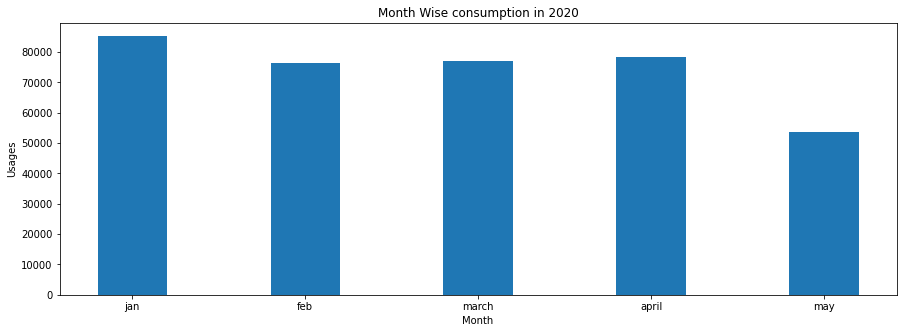

In [301]:
plt.figure(figsize = (15, 5))
plt.bar(month_2020,list2,width = 0.4)
 
plt.ylabel("Usages")
plt.xlabel("Month")
plt.title("Month Wise consumption in 2020")
plt.show()

# **Lowest consumption in the year**

In [302]:
a=min(list1)
b=list1.index(a)
c=month_2020[b]
x=min(list2)
y=list2.index(x)
z=month_2020[y]

In [303]:
print("The month in which consumption is less in 2019",c)
print("The month in which consumption is less in 2020",z)

The month in which consumption is less in 2019 feb
The month in which consumption is less in 2020 may


# **Total Usage in the year**

In [304]:
Totalusage_2020=dict()
for i in range(2020,2021):
    a=df_long[(df_long["year"]==2020)]
    b=a.Usage.sum()
    Totalusage_2020.update({i:b})

Totalusage_2019=dict()
for i in range(2019,2020):
    a=df_long[(df_long["year"]==2019)]
    b=a.Usage.sum()
    Totalusage_2019.update({i:b})

In [305]:
table7=pd.DataFrame.from_dict(Totalusage_2020,orient="index")
table8=pd.DataFrame.from_dict(Totalusage_2019,orient="index")


In [306]:
#table7.rename(columns={0:'total usage in 2020'},inplace=True)
#table8.rename(columns={0:'total usage in 2019'},inplace=True)
table7.head()

,0
2020,493522.6


In [307]:
table8.head()

,0
2019,1216205.3


In [308]:
Total_consumption= pd.concat([table7,table8])
Total_consumption.rename(columns={0:'Total Consumption'},inplace=True)
Total_consumption.head()

,Total Consumption
2020,493522.6
2019,1216205.3


# **Total Consumption in both the year**

In [309]:
T=Total_consumption.sum()
print('In 2019-2020 the',T)

In 2019-2020 the Total Consumption    1709727.9
dtype: float64


# **Type of energy**

In [310]:
RE=(0.3586*T )
print('Green',RE)

Green Total Consumption    613108.42494
dtype: float64


In [311]:
NRE=(T-RE)
print('Non-Green',NRE)

Non-Green Total Consumption    1.096619e+06
dtype: float64


In [312]:
list3={'RE':613108, "NRE":1096620}
Energy_type= list(list3.keys())
Energy_Usage=list(list3.values())

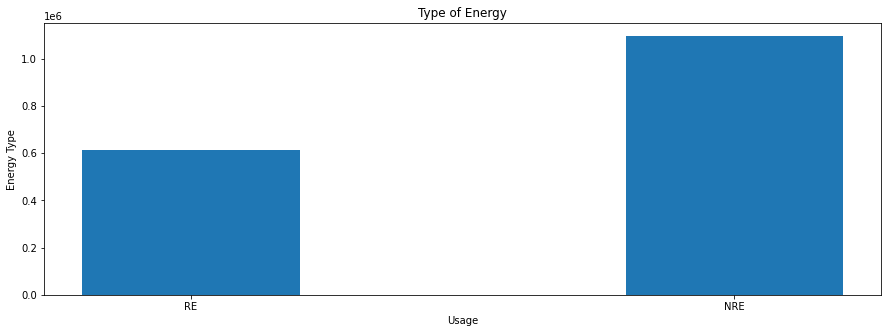

In [313]:
plt.figure(figsize = (15, 5))
plt.bar(Energy_type,Energy_Usage,width = 0.4)
 
plt.ylabel("Energy Type")
plt.xlabel("Usage")
plt.title("Type of Energy")
plt.show()

# **Pre-Covid and Post-Covid consumption of Maharashtra**

In [323]:
list4=[3,4,5]
mm2020=dict()
for i in list4:
    a=df_long[(df_long["month"]==i)&(df_long["States"]=="Maharashtra")&(df_long["year"]==2020)]
    b=a.Usage.sum()
    mm2020.update({i:b})

mm2019=dict()
for i in list4:
    a=df_long[(df_long["month"]==i)&(df_long["States"]=="Maharashtra")&(df_long["year"]==2019)]
    b=a.Usage.sum()
    mm2019.update({i:b})

In [324]:
table9=pd.DataFrame.from_dict(mm2020,orient="index")
table10=pd.DataFrame.from_dict(mm2019,orient="index")

In [337]:
table9.rename(columns={0:'Usage in March-May 2020'},inplace=True)
table10.rename(columns={0:'Usage in March-May 2019'},inplace=True)

In [343]:
list5=list(mm2019.values())
list6=list(mm2020.values())
list7=["march","april","may"]

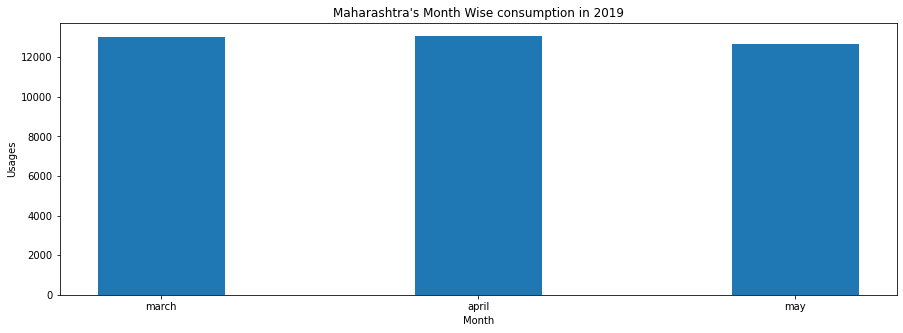

In [348]:
plt.figure(figsize = (15, 5))
plt.bar(list7,list5,width = 0.4)
 
plt.ylabel("Usages")
plt.xlabel("Month")
plt.title("Maharashtra's Month Wise consumption in 2019")
plt.show()

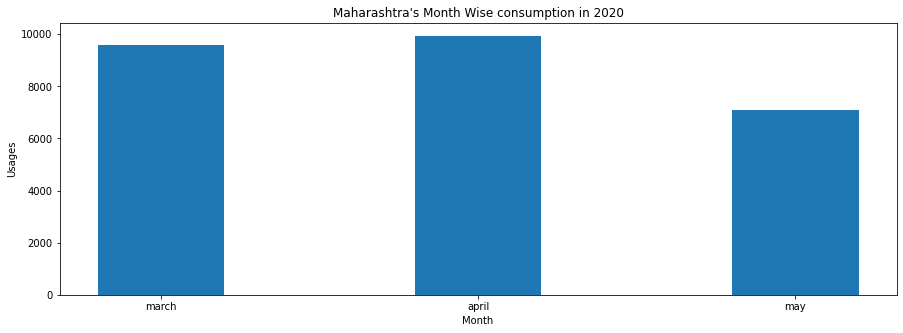

In [349]:
plt.figure(figsize = (15, 5))
plt.bar(list7,list6,width = 0.4)
 
plt.ylabel("Usages")
plt.xlabel("Month")
plt.title("Maharashtra's Month Wise consumption in 2020")
plt.show()

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/raw-data-for-ml-states/raw_data_1.csv
/kaggle/input/state-wise-power-consumption-in-india/dataset_tk.csv
/kaggle/input/state-wise-power-consumption-in-india/long_data_.csv
/kaggle/input/indian-gis-data/India States/Indian_states.shp
/kaggle/input/indian-gis-data/India States/Indian_states.prj
/kaggle/input/indian-gis-data/India States/Indian_states.dbf
/kaggle/input/indian-gis-data/India States/Indian_states.shx
/kaggle/input/indian-gis-data/India Boundary/India_boundary.dbf
/kaggle/input/indian-gis-data/India Boundary/India_boundary.prj
/kaggle/input/indian-gis-data/India Boundary/India_boundary.shx
/kaggle/input/indian-gis-data/India Boundary/India_boundary.shp
/kaggle/input/raw-data-state-for-usage/raw_data.csv
/kaggle/input/india-shape-and-country-shape-file/India-State-and-Country-Shapefile-Updated-Jan-2020-master/India_State_Boundary.shx
/kaggle/input/india-shape-and-country-shape-file/India-State-and-Country-Shapefile-Updated-Jan-2020-master/India_State_Boundary.sb

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

Storing the dataset with date in "lpowerWithDate" and removing hours.

In [3]:
lpowerWithDate=pd.read_csv("/kaggle/input/state-wise-power-consumption-in-india/long_data_.csv")
lpowerWithDate['Date_New']=pd.to_datetime(lpowerWithDate["Dates"],dayfirst=True)
lpowerWithDate.drop(["latitude","longitude", "Dates"],axis=1,inplace=True)

In [4]:
lpowerWithDate.index[lpowerWithDate.Usage == 119.9].tolist()

[0, 3621, 15303]

Store the data in "lpower" and convert the Dates column into "Day", "Month", "Year" columns.

We will drop the latitute and logitute in "lpower" data frame, since there's no use for that. We will use it in geographical plotting.

We are dropping the date column here too.


In [5]:
lpower=pd.read_csv("/kaggle/input/state-wise-power-consumption-in-india/long_data_.csv")
lpower['Dates']=pd.to_datetime(lpower["Dates"],dayfirst=True)
lpower["year"]=lpower["Dates"].dt.year
lpower["month"]=lpower["Dates"].dt.month
lpower["day"]=lpower["Dates"].dt.day
lpower.drop(["latitude","longitude","Dates"],axis=1,inplace=True)

In [6]:
lpower

,States,Regions,Usage,year,month,day
0,Punjab,NR,119.9,2019,1,2
1,Haryana,NR,130.3,2019,1,2
2,Rajasthan,NR,234.1,2019,1,2
3,Delhi,NR,85.8,2019,1,2
4,UP,NR,313.9,2019,1,2
...,...,...,...,...,...,...
16594,Manipur,NER,2.5,2020,12,5
16595,Meghalaya,NER,5.8,2020,12,5
16596,Mizoram,NER,1.6,2020,12,5
16597,Nagaland,NER,2.1,2020,12,5


In [7]:
lpower.shape

(16599, 6)

In [8]:
lpower.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16599 entries, 0 to 16598
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   States   16599 non-null  object 
 1   Regions  16599 non-null  object 
 2   Usage    16599 non-null  float64
 3   year     16599 non-null  int64  
 4   month    16599 non-null  int64  
 5   day      16599 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 778.2+ KB


In [9]:
lpower1=pd.read_csv("/kaggle/input/state-wise-power-consumption-in-india/long_data_.csv")
lpower1['Dates']=pd.to_datetime(lpower1["Dates"],dayfirst=True)
lpower1["year"]=lpower1["Dates"].dt.year
lpower1["month"]=lpower1["Dates"].dt.month
lpower1["day"]=lpower1["Dates"].dt.day
lpower1.drop(["latitude","longitude"],axis=1,inplace=True)

In [10]:
lpower1

,States,Regions,Dates,Usage,year,month,day
0,Punjab,NR,2019-01-02,119.9,2019,1,2
1,Haryana,NR,2019-01-02,130.3,2019,1,2
2,Rajasthan,NR,2019-01-02,234.1,2019,1,2
3,Delhi,NR,2019-01-02,85.8,2019,1,2
4,UP,NR,2019-01-02,313.9,2019,1,2
...,...,...,...,...,...,...,...
16594,Manipur,NER,2020-12-05,2.5,2020,12,5
16595,Meghalaya,NER,2020-12-05,5.8,2020,12,5
16596,Mizoram,NER,2020-12-05,1.6,2020,12,5
16597,Nagaland,NER,2020-12-05,2.1,2020,12,5


# **1) On which *DAY*, did we see the highest & lowest consumption in India**

In [11]:
dictday=dict()
for i in range(1,32):
    day = lpower[lpower['day']==i]
    day_usage = day["Usage"].sum()
    dictday.update({i:day_usage})
dictday

{1: 62630.100000000006,
 2: 81678.4,
 3: 81592.6,
 4: 81350.40000000001,
 5: 81672.20000000001,
 6: 40160.5,
 7: 22434.800000000003,
 8: 40722.399999999994,
 9: 40675.4,
 10: 41757.7,
 11: 42334.8,
 12: 44003.2,
 13: 57716.59999999999,
 14: 58039.0,
 15: 57502.399999999994,
 16: 58247.4,
 17: 59688.7,
 18: 59311.600000000006,
 19: 59691.8,
 20: 58880.90000000001,
 21: 59337.100000000006,
 22: 58009.1,
 23: 59011.6,
 24: 55272.0,
 25: 55075.5,
 26: 54650.2,
 27: 54794.100000000006,
 28: 53726.7,
 29: 52004.7,
 30: 47628.100000000006,
 31: 30127.9}

In [12]:
dayList = list(dictday.values())
dayMax = max(dayList)
dayMin = min(dayList)
print(f"On {dayList.index(dayMax) + 1} we say the maximum usage in the entire country")
print(f"On {dayList.index(dayMin) + 1} we say the minimum usage in the entire country")

On 2 we say the maximum usage in the entire country
On 7 we say the minimum usage in the entire country


VISUALIZATION OF THE ABOVE

In [13]:
dictdayTable = pd.DataFrame.from_dict(dictday, orient="index")
dictdayTable.rename(columns={0:"Total Usages Daily Combined All States"},inplace=True)
dictdayTable

,Total Usages Daily Combined All States
1,62630.1
2,81678.4
3,81592.6
4,81350.4
5,81672.2
6,40160.5
7,22434.8
8,40722.4
9,40675.4
10,41757.7


<AxesSubplot:ylabel='Total Usages Daily Combined All States'>

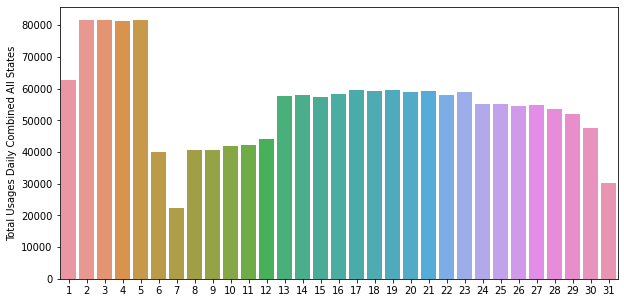

In [14]:
plt.figure(figsize=(10, 5))
sns.barplot(y="Total Usages Daily Combined All States",x=dictdayTable.index,data=dictdayTable)

# **1) On which *DAY*, did we see the highest & lowest consumption in India in 2019**

In [15]:
dictday2019=dict()
for i in range(1,32):
    day = lpower[(lpower['day']==i) & (lpower['year']==2019)]
    day_usage = day["Usage"].sum()
    dictday2019.update({i:day_usage})
dictday2019

{1: 20811.5,
 2: 39992.6,
 3: 40783.799999999996,
 4: 40612.8,
 5: 40730.4,
 6: 40160.5,
 7: 22434.800000000003,
 8: 40722.399999999994,
 9: 40675.4,
 10: 41757.7,
 11: 42334.8,
 12: 44003.2,
 13: 41537.7,
 14: 41814.8,
 15: 40601.0,
 16: 41282.0,
 17: 42628.700000000004,
 18: 42203.6,
 19: 42238.9,
 20: 41318.7,
 21: 41805.8,
 22: 41693.7,
 23: 42184.0,
 24: 41776.100000000006,
 25: 41782.40000000001,
 26: 40628.600000000006,
 27: 40563.7,
 28: 39357.899999999994,
 29: 37579.8,
 30: 36909.2,
 31: 23278.800000000003}

In [16]:
dayList2019 = list(dictday2019.values())
dayMax2019 = max(dayList2019)
dayMin2019 = min(dayList2019)
print(f"On {dayList2019.index(dayMax2019) + 1} we say the maximum usage in the entire country in 2019")
print(f"On {dayList2019.index(dayMin2019) + 1} we say the minimum usage in the entire country in 2019")

On 12 we say the maximum usage in the entire country in 2019
On 1 we say the minimum usage in the entire country in 2019


VISUALIZATION OF ABOVE

In [17]:
dictdayTable2019 = pd.DataFrame.from_dict(dictday2019, orient="index")
dictdayTable2019.rename(columns={0:"Total Usages Daily Combined All States in 2019"},inplace=True)
dictdayTable2019

,Total Usages Daily Combined All States in 2019
1,20811.5
2,39992.6
3,40783.8
4,40612.8
5,40730.4
6,40160.5
7,22434.8
8,40722.4
9,40675.4
10,41757.7


<AxesSubplot:ylabel='Total Usages Daily Combined All States in 2019'>

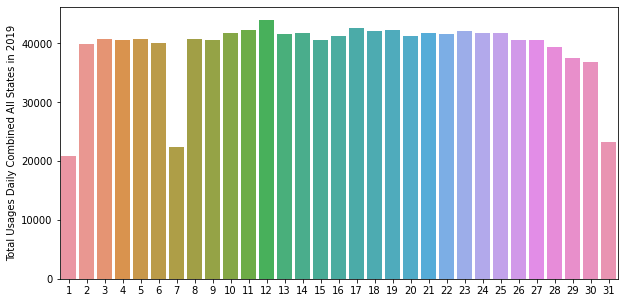

In [18]:
plt.figure(figsize=(10, 5))
sns.barplot(y="Total Usages Daily Combined All States in 2019",x=dictdayTable2019.index,data=dictdayTable2019)

# **1) On which *DAY*, did we see the highest & lowest consumption in India in 2020**

In [19]:
dictday2020=dict()
for i in range(1,32):
    day = lpower[(lpower['day']==i) & (lpower['year']==2020)]
    day_usage = day["Usage"].sum()
    dictday2020.update({i:day_usage})
dictday2020

{1: 41818.6,
 2: 41685.8,
 3: 40808.8,
 4: 40737.6,
 5: 40941.8,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 10: 0.0,
 11: 0.0,
 12: 0.0,
 13: 16178.900000000001,
 14: 16224.2,
 15: 16901.399999999998,
 16: 16965.4,
 17: 17060.0,
 18: 17108.0,
 19: 17452.899999999998,
 20: 17562.199999999997,
 21: 17531.300000000003,
 22: 16315.4,
 23: 16827.600000000002,
 24: 13495.900000000001,
 25: 13293.1,
 26: 14021.599999999999,
 27: 14230.4,
 28: 14368.800000000001,
 29: 14424.9,
 30: 10718.9,
 31: 6849.1}

In [20]:
dayList2020 = list(dictday2020.values())
dayMax2020 = max(dayList2020)
dayMin2020 = min(dayList2020)
print(f"On {dayList2020.index(dayMax2020) + 1} we say the maximum usage in the entire country in 2020")
print(f"On {dayList2020.index(dayMin2020) + 1} we say the minimum usage in the entire country in 2020")

On 1 we say the maximum usage in the entire country in 2020
On 6 we say the minimum usage in the entire country in 2020


In [21]:
dictdayTable2020 = pd.DataFrame.from_dict(dictday2020, orient="index")
dictdayTable2020.rename(columns={0:"Total Usages Daily Combined All States in 2020"},inplace=True)
dictdayTable2020

,Total Usages Daily Combined All States in 2020
1,41818.6
2,41685.8
3,40808.8
4,40737.6
5,40941.8
6,0.0
7,0.0
8,0.0
9,0.0
10,0.0


<AxesSubplot:ylabel='Total Usages Daily Combined All States in 2020'>

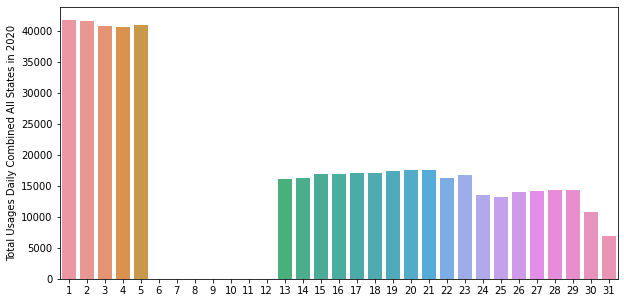

In [22]:
plt.figure(figsize=(10, 5))
sns.barplot(y="Total Usages Daily Combined All States in 2020",x=dictdayTable2020.index,data=dictdayTable2020)

# **On which *DATE*, did we saw highest and lowest consumption in India both in 2019 and 2020**

In [23]:
dailyUsage = list(lpower.Usage)
dailyUsageMax = max(dailyUsage)
dailyUsageMin = min(dailyUsage)

dailyUsageMaxIndex = dailyUsage.index(dailyUsageMax)
dailyUsageMinIndex = dailyUsage.index(dailyUsageMin)

datesNew = lpowerWithDate['Date_New'].dt.date

print(f"On {datesNew[dailyUsageMaxIndex]} is the maximum usage in India, which is {dailyUsageMax}")
print(f"On {datesNew[dailyUsageMinIndex]} is the minimum usage in India, which is {dailyUsageMin}")

On 2019-06-20 is the maximum usage in India, which is 522.1
On 2020-02-03 is the minimum usage in India, which is 0.3


# **On which *DATE* and which *STATE*, showed the maximum and minimum usage both in 2019 and 2020?**

In [24]:
print(f"On {datesNew[dailyUsageMaxIndex]}, in {(lpower['States'])[dailyUsageMaxIndex]} is the maximum usage in India, which is {dailyUsageMax}")
print(f"On {datesNew[dailyUsageMinIndex]} in {(lpower['States'])[dailyUsageMinIndex]} is the minimum usage in India, which is {dailyUsageMin}")

On 2019-06-20, in Maharashtra is the maximum usage in India, which is 522.1
On 2020-02-03 in Sikkim is the minimum usage in India, which is 0.3


# **State wise, which date had the maximum and minimum usage both in 2019 and 2020?**

In [25]:
dictStateMax = dict()
dictStateDateMax = dict()
for i in (lpowerWithDate.States.unique()):
    #creating a df with only unique states
    onlyStates = lpowerWithDate[(lpowerWithDate.States == i)]
    
    #finding the max of usage from the list
    stateWiseUsageMax = max(onlyStates.Usage)
    
    #updating the dictornary with the state:max_usage
    dictStateMax.update({i:stateWiseUsageMax})
    
    #get index of the max usage statewise and add them into a lisy
    statesWiseMaxIndex = onlyStates.index[onlyStates.Usage == stateWiseUsageMax].tolist()
    
    #retrieve only the 1st value of the list
    newStatesWiseMaxIndex = statesWiseMaxIndex[0]
    
    #remove the time from the date_new column
    onlyStatesDFDatesNew = onlyStates.Date_New.dt.date
    
    #store the dates in a dict of the max usage statewise
    dictStateDateMax.update({i:onlyStatesDFDatesNew[newStatesWiseMaxIndex]})
    #print (onlyStatesDFDatesNew[newStatesWiseMaxIndex])
    
print ("Dictornary",dictStateMax)
print ("Dict", dictStateDateMax)
    
    

Dictornary {'Punjab': 300.0, 'Haryana': 237.2, 'Rajasthan': 278.0, 'Delhi': 147.1, 'UP': 471.8, 'Uttarakhand': 53.2, 'HP': 34.0, 'J&K': 54.2, 'Chandigarh': 7.4, 'Chhattisgarh': 111.6, 'Gujarat': 400.8, 'MP': 272.3, 'Maharashtra': 522.1, 'Goa': 14.0, 'DNH': 19.5, 'Andhra Pradesh': 205.1, 'Telangana': 256.2, 'Karnataka': 273.3, 'Kerala': 89.4, 'Tamil Nadu': 365.4, 'Pondy': 9.7, 'Bihar': 121.4, 'Jharkhand': 28.9, 'Odisha': 113.0, 'West Bengal': 198.5, 'Sikkim': 2.8, 'Arunachal Pradesh': 2.7, 'Assam': 38.0, 'Manipur': 3.2, 'Meghalaya': 6.9, 'Mizoram': 2.2, 'Nagaland': 2.7, 'Tripura': 6.6}
Dict {'Punjab': datetime.date(2020, 10, 4), 'Haryana': datetime.date(2020, 10, 4), 'Rajasthan': datetime.date(2019, 12, 1), 'Delhi': datetime.date(2020, 10, 3), 'UP': datetime.date(2020, 4, 28), 'Uttarakhand': datetime.date(2019, 12, 4), 'HP': datetime.date(2019, 10, 31), 'J&K': datetime.date(2020, 2, 21), 'Chandigarh': datetime.date(2020, 10, 4), 'Chhattisgarh': datetime.date(2019, 5, 13), 'Gujarat': dat

Convert dict to df

In [26]:
stateWiseMaxUsage = pd.DataFrame.from_dict(dictStateMax, orient="index")
stateWiseMaxUsage.rename(columns={0:'Max Usage in 2019 and 2020'},inplace=True)

stateWiseMaxDate = pd.DataFrame.from_dict(dictStateDateMax, orient="index")
stateWiseMaxDate.rename(columns={0:'Date'},inplace=True)

pd.concat([stateWiseMaxUsage, stateWiseMaxDate], axis = 1)

,Max Usage in 2019 and 2020,Date
Punjab,300.0,2020-10-04
Haryana,237.2,2020-10-04
Rajasthan,278.0,2019-12-01
Delhi,147.1,2020-10-03
UP,471.8,2020-04-28
Uttarakhand,53.2,2019-12-04
HP,34.0,2019-10-31
J&K,54.2,2020-02-21
Chandigarh,7.4,2020-10-04
Chhattisgarh,111.6,2019-05-13


VISUALITZATION OF ABOVE

<AxesSubplot:xlabel='Max Usage in 2019 and 2020'>

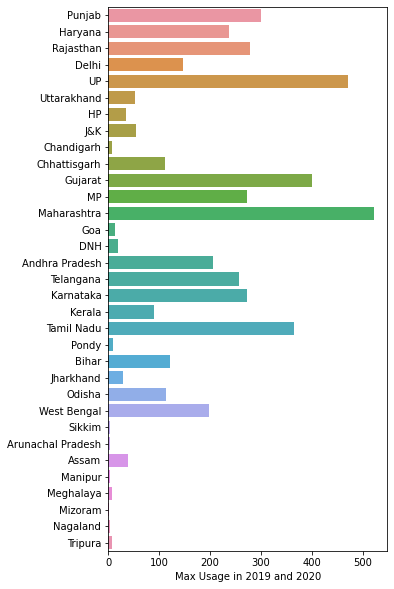

In [27]:
plt.figure(figsize=(5, 10))
sns.barplot(x="Max Usage in 2019 and 2020",y=stateWiseMaxUsage.index,data=stateWiseMaxUsage)

In [28]:
dictStateMin = dict()
dictStateDateMin = dict()
for i in (lpowerWithDate.States.unique()):
    #creating a df with only unique states
    onlyStates = lpowerWithDate[(lpowerWithDate.States == i)]
    
    #finding the max of usage from the list
    stateWiseUsageMin = min(onlyStates.Usage)
    
    #updating the dictornary with the state:min_usage
    dictStateMin.update({i:stateWiseUsageMin})
    
    #get index of the min usage statewise and add them into a lisy
    statesWiseMinIndex = onlyStates.index[onlyStates.Usage == stateWiseUsageMin].tolist()
    
    #retrieve only the 1st value of the list
    newStatesWiseMinIndex = statesWiseMinIndex[0]
    
    #remove the time from the date_new column
    onlyStatesDFDatesNew = onlyStates.Date_New.dt.date
    
    #store the dates in a dict of the min usage statewise
    dictStateDateMin.update({i:onlyStatesDFDatesNew[newStatesWiseMinIndex]})
    #print (onlyStatesDFDatesNew[newStatesWiseMinIndex])
    
print ("Dictornary",dictStateMin)
print ("Dict", dictStateDateMin)

Dictornary {'Punjab': 56.1, 'Haryana': 64.8, 'Rajasthan': 105.8, 'Delhi': 41.8, 'UP': 186.8, 'Uttarakhand': 16.8, 'HP': 11.8, 'J&K': 17.8, 'Chandigarh': 2.2, 'Chhattisgarh': 37.2, 'Gujarat': 192.3, 'MP': 131.8, 'Maharashtra': 305.6, 'Goa': 6.2, 'DNH': 1.3, 'Andhra Pradesh': 130.6, 'Telangana': 130.5, 'Karnataka': 121.0, 'Kerala': 55.0, 'Tamil Nadu': 195.7, 'Pondy': 4.0, 'Bihar': 43.5, 'Jharkhand': 17.4, 'Odisha': 51.1, 'West Bengal': 51.5, 'Sikkim': 0.3, 'Arunachal Pradesh': 1.1, 'Assam': 12.2, 'Manipur': 1.5, 'Meghalaya': 3.3, 'Mizoram': 1.2, 'Nagaland': 1.4, 'Tripura': 1.4}
Dict {'Punjab': datetime.date(2019, 6, 2), 'Haryana': datetime.date(2019, 6, 2), 'Rajasthan': datetime.date(2019, 5, 31), 'Delhi': datetime.date(2019, 1, 30), 'UP': datetime.date(2019, 12, 26), 'Uttarakhand': datetime.date(2019, 1, 30), 'HP': datetime.date(2019, 11, 8), 'J&K': datetime.date(2020, 4, 1), 'Chandigarh': datetime.date(2019, 1, 30), 'Chhattisgarh': datetime.date(2019, 2, 26), 'Gujarat': datetime.date(2

In [29]:
stateWiseMinUsage = pd.DataFrame.from_dict(dictStateMin, orient="index")
stateWiseMinUsage.rename(columns={0:'Min Usage in 2019 and 2020'},inplace=True)

stateWiseMinDate = pd.DataFrame.from_dict(dictStateDateMin, orient="index")
stateWiseMinDate.rename(columns={0:'Date'},inplace=True)

pd.concat([stateWiseMinUsage, stateWiseMinDate], axis = 1)

,Min Usage in 2019 and 2020,Date
Punjab,56.1,2019-06-02
Haryana,64.8,2019-06-02
Rajasthan,105.8,2019-05-31
Delhi,41.8,2019-01-30
UP,186.8,2019-12-26
Uttarakhand,16.8,2019-01-30
HP,11.8,2019-11-08
J&K,17.8,2020-04-01
Chandigarh,2.2,2019-01-30
Chhattisgarh,37.2,2019-02-26


VISUALIZATION OF ABOVE

<AxesSubplot:xlabel='Min Usage in 2019 and 2020'>

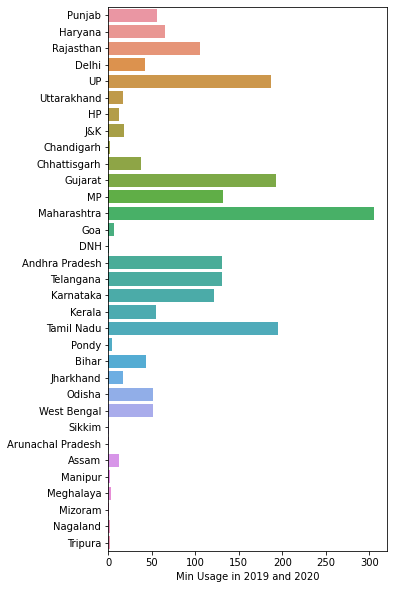

In [30]:
plt.figure(figsize=(5, 10))
sns.barplot(x="Min Usage in 2019 and 2020",y=stateWiseMinUsage.index,data=stateWiseMinUsage)

# **State wise, which date had the maximum and minimum usage in 2019?**

In [31]:
dictStateMax2019 = dict()
dictStateDateMax2019 = dict()
for i in (lpower1.States.unique()):
    #creating a df with only unique states
    onlyStates = lpower1[(lpower1.States == i)& (lpower1.year == 2019)]
    
    #finding the max of usage from the list
    stateWiseUsageMax = max(onlyStates.Usage)
    
    #updating the dictornary with the state:max_usage
    dictStateMax2019.update({i:stateWiseUsageMax})
    
    #get index of the max usage statewise and add them into a lisy
    statesWiseMaxIndex = onlyStates.index[onlyStates.Usage == stateWiseUsageMax].tolist()
    
    #retrieve only the 1st value of the list
    newStatesWiseMaxIndex = statesWiseMaxIndex[0]
    
    #remove the time from the date_new column
    onlyStatesDFDatesNew = onlyStates.Dates.dt.date
    
    #store the dates in a dict of the max usage statewise
    dictStateDateMax2019.update({i:onlyStatesDFDatesNew[newStatesWiseMaxIndex]})
    #print (onlyStatesDFDatesNew[newStatesWiseMaxIndex])
    
print ("Dictornary",dictStateMax2019)
print ("Dict", dictStateDateMax2019)

Dictornary {'Punjab': 286.0, 'Haryana': 224.5, 'Rajasthan': 278.0, 'Delhi': 139.1, 'UP': 469.0, 'Uttarakhand': 53.2, 'HP': 34.0, 'J&K': 54.1, 'Chandigarh': 6.8, 'Chhattisgarh': 111.6, 'Gujarat': 398.0, 'MP': 272.3, 'Maharashtra': 522.1, 'Goa': 14.0, 'DNH': 19.4, 'Andhra Pradesh': 205.1, 'Telangana': 256.2, 'Karnataka': 273.3, 'Kerala': 89.4, 'Tamil Nadu': 365.3, 'Pondy': 9.7, 'Bihar': 117.9, 'Jharkhand': 28.9, 'Odisha': 109.6, 'West Bengal': 198.1, 'Sikkim': 2.8, 'Arunachal Pradesh': 2.6, 'Assam': 38.0, 'Manipur': 3.2, 'Meghalaya': 6.8, 'Mizoram': 2.2, 'Nagaland': 2.7, 'Tripura': 6.6}
Dict {'Punjab': datetime.date(2019, 4, 19), 'Haryana': datetime.date(2019, 4, 18), 'Rajasthan': datetime.date(2019, 12, 1), 'Delhi': datetime.date(2019, 12, 1), 'UP': datetime.date(2019, 2, 24), 'Uttarakhand': datetime.date(2019, 12, 4), 'HP': datetime.date(2019, 10, 31), 'J&K': datetime.date(2019, 1, 3), 'Chandigarh': datetime.date(2019, 4, 18), 'Chhattisgarh': datetime.date(2019, 5, 13), 'Gujarat': date

In [32]:
stateWiseMaxUsage2019 = pd.DataFrame.from_dict(dictStateMax2019, orient="index")
stateWiseMaxUsage2019.rename(columns={0:'Max Usage in 2019'},inplace=True)

stateWiseMaxDate2019 = pd.DataFrame.from_dict(dictStateDateMax2019, orient="index")
stateWiseMaxDate2019.rename(columns={0:'Date'},inplace=True)

pd.concat([stateWiseMaxUsage2019, stateWiseMaxDate2019], axis = 1)

,Max Usage in 2019,Date
Punjab,286.0,2019-04-19
Haryana,224.5,2019-04-18
Rajasthan,278.0,2019-12-01
Delhi,139.1,2019-12-01
UP,469.0,2019-02-24
Uttarakhand,53.2,2019-12-04
HP,34.0,2019-10-31
J&K,54.1,2019-01-03
Chandigarh,6.8,2019-04-18
Chhattisgarh,111.6,2019-05-13


<AxesSubplot:xlabel='Max Usage in 2019'>

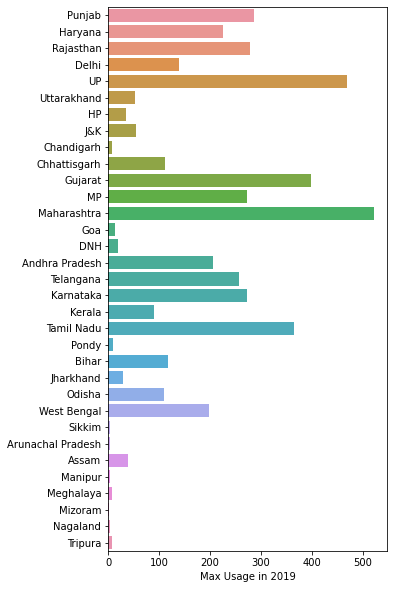

In [33]:
plt.figure(figsize=(5, 10))
sns.barplot(x="Max Usage in 2019",y=stateWiseMaxUsage2019.index,data=stateWiseMaxUsage2019)

# **State wise, which date had the maximum and minimum usage in 2020?**

In [34]:
dictStateMax2020 = dict()
dictStateDateMax2020 = dict()
for i in (lpower1.States.unique()):
    #creating a df with only unique states
    onlyStates = lpower1[(lpower1.States == i)& (lpower1.year == 2020)]
    
    #finding the max of usage from the list
    stateWiseUsageMax = max(onlyStates.Usage)
    
    #updating the dictornary with the state:max_usage
    dictStateMax2020.update({i:stateWiseUsageMax})
    
    #get index of the max usage statewise and add them into a lisy
    statesWiseMaxIndex = onlyStates.index[onlyStates.Usage == stateWiseUsageMax].tolist()
    
    #retrieve only the 1st value of the list
    newStatesWiseMaxIndex = statesWiseMaxIndex[0]
    
    #remove the time from the date_new column
    onlyStatesDFDatesNew = onlyStates.Dates.dt.date
    
    #store the dates in a dict of the max usage statewise
    dictStateDateMax2020.update({i:onlyStatesDFDatesNew[newStatesWiseMaxIndex]})
    #print (onlyStatesDFDatesNew[newStatesWiseMaxIndex])
    
print ("Dictornary",dictStateMax2020)
print ("Dict", dictStateDateMax2020)

Dictornary {'Punjab': 300.0, 'Haryana': 237.2, 'Rajasthan': 275.2, 'Delhi': 147.1, 'UP': 471.8, 'Uttarakhand': 48.5, 'HP': 31.8, 'J&K': 54.2, 'Chandigarh': 7.4, 'Chhattisgarh': 103.0, 'Gujarat': 400.8, 'MP': 270.1, 'Maharashtra': 504.1, 'Goa': 13.7, 'DNH': 19.5, 'Andhra Pradesh': 205.0, 'Telangana': 254.1, 'Karnataka': 259.2, 'Kerala': 88.6, 'Tamil Nadu': 365.4, 'Pondy': 9.5, 'Bihar': 121.4, 'Jharkhand': 28.9, 'Odisha': 113.0, 'West Bengal': 198.5, 'Sikkim': 2.1, 'Arunachal Pradesh': 2.7, 'Assam': 36.1, 'Manipur': 3.0, 'Meghalaya': 6.9, 'Mizoram': 2.1, 'Nagaland': 2.6, 'Tripura': 5.6}
Dict {'Punjab': datetime.date(2020, 10, 4), 'Haryana': datetime.date(2020, 10, 4), 'Rajasthan': datetime.date(2020, 4, 30), 'Delhi': datetime.date(2020, 10, 3), 'UP': datetime.date(2020, 4, 28), 'Uttarakhand': datetime.date(2020, 2, 23), 'HP': datetime.date(2020, 10, 4), 'J&K': datetime.date(2020, 2, 21), 'Chandigarh': datetime.date(2020, 10, 4), 'Chhattisgarh': datetime.date(2020, 12, 3), 'Gujarat': date

In [35]:
stateWiseMaxUsage2020 = pd.DataFrame.from_dict(dictStateMax2020, orient="index")
stateWiseMaxUsage2020.rename(columns={0:'Max Usage in 2020'},inplace=True)

stateWiseMaxDate2020 = pd.DataFrame.from_dict(dictStateDateMax2020, orient="index")
stateWiseMaxDate2020.rename(columns={0:'Date'},inplace=True)

pd.concat([stateWiseMaxUsage2020, stateWiseMaxDate2020], axis = 1)

,Max Usage in 2020,Date
Punjab,300.0,2020-10-04
Haryana,237.2,2020-10-04
Rajasthan,275.2,2020-04-30
Delhi,147.1,2020-10-03
UP,471.8,2020-04-28
Uttarakhand,48.5,2020-02-23
HP,31.8,2020-10-04
J&K,54.2,2020-02-21
Chandigarh,7.4,2020-10-04
Chhattisgarh,103.0,2020-12-03


<AxesSubplot:xlabel='Max Usage in 2020'>

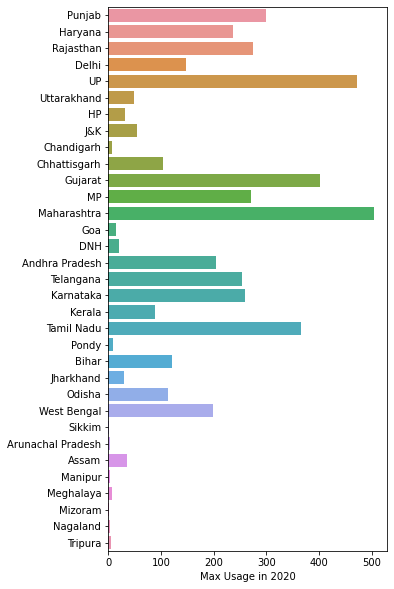

In [36]:
plt.figure(figsize=(5, 10))
sns.barplot(x="Max Usage in 2020",y=stateWiseMaxUsage2020.index,data=stateWiseMaxUsage2020)

# **Scatter Plot for some states**

In [37]:
lpowerWithDate

,States,Regions,Usage,Date_New
0,Punjab,NR,119.9,2019-01-02
1,Haryana,NR,130.3,2019-01-02
2,Rajasthan,NR,234.1,2019-01-02
3,Delhi,NR,85.8,2019-01-02
4,UP,NR,313.9,2019-01-02
...,...,...,...,...
16594,Manipur,NER,2.5,2020-12-05
16595,Meghalaya,NER,5.8,2020-12-05
16596,Mizoram,NER,1.6,2020-12-05
16597,Nagaland,NER,2.1,2020-12-05


In [38]:
sdayPunjab = lpowerWithDate[lpowerWithDate['States']=='Punjab']
sdayPunjab
    

,States,Regions,Usage,Date_New
0,Punjab,NR,119.9,2019-01-02
33,Punjab,NR,121.9,2019-01-03
66,Punjab,NR,118.8,2019-01-04
99,Punjab,NR,121.0,2019-01-05
132,Punjab,NR,121.4,2019-01-06
...,...,...,...,...
16434,Punjab,NR,130.8,2020-12-01
16467,Punjab,NR,129.4,2020-12-02
16500,Punjab,NR,132.1,2020-12-03
16533,Punjab,NR,132.1,2020-12-04


<AxesSubplot:title={'center':'Scatter Plot of Punjab Usage'}, xlabel='Date_New', ylabel='Usage'>

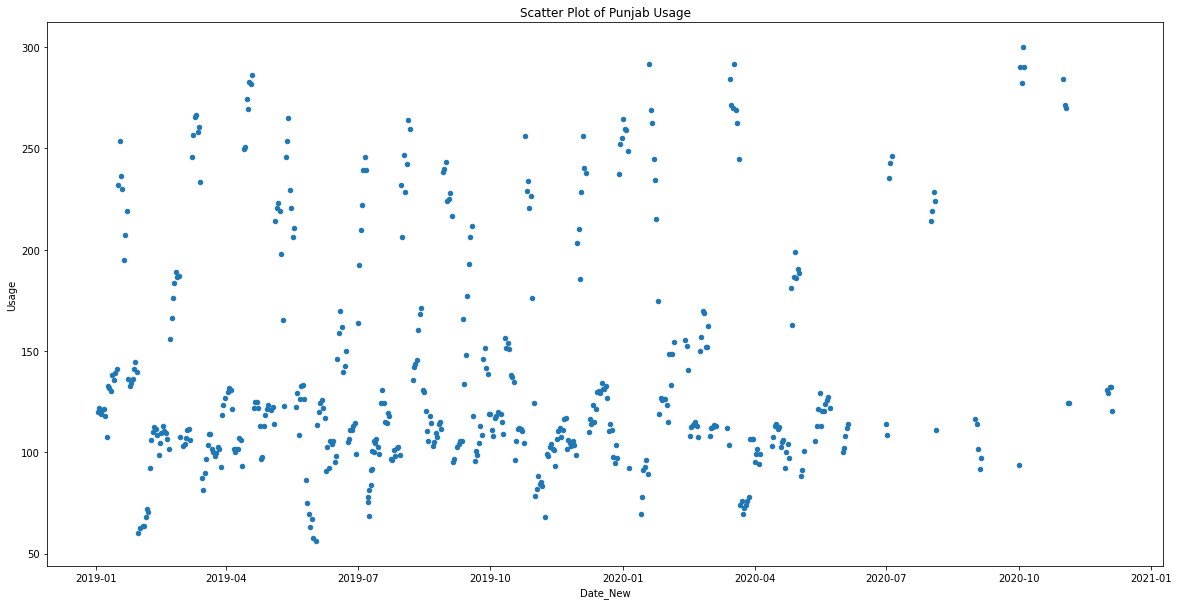

In [39]:
sdayPunjab.plot.scatter(x='Date_New', y='Usage', figsize=(20,10), title='Scatter Plot of Punjab Usage')

# **Total Usage in Each State for both 2019 and 2020**

In [40]:
dictTotal = dict()
for i in lpower.States.unique():
    newDf = lpower[(lpower.States == i)]
    sumUsage = newDf.Usage.sum()
    dictTotal.update({i:sumUsage})
dictTotal

{'Punjab': 70996.2,
 'Haryana': 69581.8,
 'Rajasthan': 109877.0,
 'Delhi': 41940.5,
 'UP': 157960.3,
 'Uttarakhand': 18187.0,
 'HP': 13363.8,
 'J&K': 22264.8,
 'Chandigarh': 2083.2,
 'Chhattisgarh': 42190.2,
 'Gujarat': 162488.90000000002,
 'MP': 104766.40000000001,
 'Maharashtra': 217079.8,
 'Goa': 5579.900000000001,
 'DNH': 8264.6,
 'Andhra Pradesh': 88604.4,
 'Telangana': 94065.3,
 'Karnataka': 102665.70000000001,
 'Kerala': 36312.8,
 'Tamil Nadu': 151271.5,
 'Pondy': 3758.9,
 'Bihar': 41829.2,
 'Jharkhand': 11992.8,
 'Odisha': 40473.7,
 'West Bengal': 69770.20000000001,
 'Sikkim': 648.5999999999999,
 'Arunachal Pradesh': 1060.9,
 'Assam': 12554.9,
 'Manipur': 1254.8000000000002,
 'Meghalaya': 2838.8,
 'Mizoram': 858.3,
 'Nagaland': 1087.7,
 'Tripura': 2055.0}

In [41]:
stateWiseUsageDF = pd.DataFrame.from_dict(dictTotal, orient="index")
stateWiseUsageDF.rename(columns={0:'Total Usage in 2019 and 2020'},inplace=True)
stateWiseUsageDF

,Total Usage in 2019 and 2020
Punjab,70996.2
Haryana,69581.8
Rajasthan,109877.0
Delhi,41940.5
UP,157960.3
Uttarakhand,18187.0
HP,13363.8
J&K,22264.8
Chandigarh,2083.2
Chhattisgarh,42190.2


# **Training and Prediction of Punjabs Data**

In [42]:
onlyPunjabData = lpower[lpower['States']=='Punjab']

predictPunjabUsage = onlyPunjabData.copy()
target = predictPunjabUsage.Usage
predictPunjabUsage.drop(["States","Regions", "Usage"],axis=1,inplace=True)
predictPunjabUsage = predictPunjabUsage[["day", "month", "year"]]
predictPunjabUsage

,day,month,year
0,2,1,2019
33,3,1,2019
66,4,1,2019
99,5,1,2019
132,6,1,2019
...,...,...,...
16434,1,12,2020
16467,2,12,2020
16500,3,12,2020
16533,4,12,2020


In [43]:
target

0        119.9
33       121.9
66       118.8
99       121.0
132      121.4
         ...  
16434    130.8
16467    129.4
16500    132.1
16533    132.1
16566    120.4
Name: Usage, Length: 503, dtype: float64

In [44]:
from sklearn.ensemble import RandomForestRegressor

my_model = RandomForestRegressor(n_estimators=100, criterion='mae', random_state=0)

**Importing raw data**

In [45]:
rawData = pd.read_csv('../input/raw-data-state-for-usage/raw_data.csv')
rawData

,day,month,year
0,1,1,2021
1,2,1,2021
2,3,1,2021
3,4,1,2021
4,5,1,2021
5,6,1,2021
6,7,1,2021
7,8,1,2021
8,9,1,2021
9,10,1,2021


In [46]:
my_model.fit(predictPunjabUsage, target)

predictPunjabData = my_model.predict(rawData)
predictedPunjabValueDF = pd.DataFrame(predictPunjabData)
predictedPunjabValueDF.rename(columns={0:'Predicted Ouputs'},inplace=True)

PredictedDataFrame = pd.concat([rawData, predictedPunjabValueDF], axis=1)
PredictedDataFrame

,day,month,year,Predicted Ouputs
0,1,1,2021,257.8535
1,2,1,2021,248.9815
2,3,1,2021,241.0405
3,4,1,2021,219.2575
4,5,1,2021,128.8305
5,6,1,2021,123.6105
6,7,1,2021,123.5975
7,8,1,2021,123.2945
8,9,1,2021,100.9535
9,10,1,2021,83.5275


**Scatter Plot of Predicted Usage Values of Punjab Satte**

<AxesSubplot:title={'center':'Scatter Plot of Predicted Punjab State Usage'}, xlabel='day', ylabel='Predicted Ouputs'>

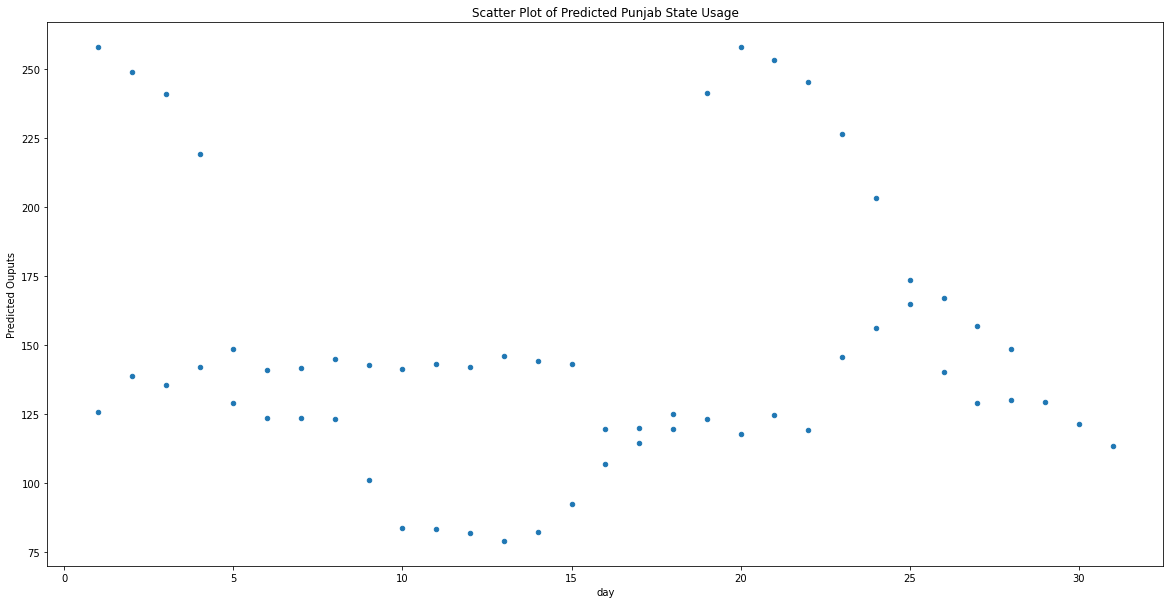

In [47]:
PredictedDataFrame.plot.scatter(x='day', y='Predicted Ouputs', figsize=(20,10), title='Scatter Plot of Predicted Punjab State Usage')

# **Plot usage on India Map**

**Total usage (2019 and 2020 included) on India Map**

In [48]:
import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt 

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [49]:
lpower.head()

,States,Regions,Usage,year,month,day
0,Punjab,NR,119.9,2019,1,2
1,Haryana,NR,130.3,2019,1,2
2,Rajasthan,NR,234.1,2019,1,2
3,Delhi,NR,85.8,2019,1,2
4,UP,NR,313.9,2019,1,2


In [50]:
dictUsage=dict()
for i in lpower.States.unique():
    stateUsageDF = lpower[(lpower['States']==i)]
    stateUsage = stateUsageDF["Usage"].sum()
    dictUsage.update({i:stateUsage})
dictUsage

{'Punjab': 70996.2,
 'Haryana': 69581.8,
 'Rajasthan': 109877.0,
 'Delhi': 41940.5,
 'UP': 157960.3,
 'Uttarakhand': 18187.0,
 'HP': 13363.8,
 'J&K': 22264.8,
 'Chandigarh': 2083.2,
 'Chhattisgarh': 42190.2,
 'Gujarat': 162488.90000000002,
 'MP': 104766.40000000001,
 'Maharashtra': 217079.8,
 'Goa': 5579.900000000001,
 'DNH': 8264.6,
 'Andhra Pradesh': 88604.4,
 'Telangana': 94065.3,
 'Karnataka': 102665.70000000001,
 'Kerala': 36312.8,
 'Tamil Nadu': 151271.5,
 'Pondy': 3758.9,
 'Bihar': 41829.2,
 'Jharkhand': 11992.8,
 'Odisha': 40473.7,
 'West Bengal': 69770.20000000001,
 'Sikkim': 648.5999999999999,
 'Arunachal Pradesh': 1060.9,
 'Assam': 12554.9,
 'Manipur': 1254.8000000000002,
 'Meghalaya': 2838.8,
 'Mizoram': 858.3,
 'Nagaland': 1087.7,
 'Tripura': 2055.0}

In [51]:
stateUsageDF = pd.DataFrame.from_dict(dictUsage, orient="index")
stateUsageDF.reset_index(level=0, inplace=True)
stateUsageDF.rename(columns={'index': 'States', 0:'Total Usage in 2019 and 2020'},inplace=True)
stateUsageDF['States'] = stateUsageDF['States'].replace(['UP','HP','J&K','MP','DNH','Delhi'],['Uttar Pradesh','Himachal Pradesh','Jammu & Kashmir','Madhya Pradesh','Dadara & Nagar Havelli','NCT of Delhi'])
stateUsageDF

,States,Total Usage in 2019 and 2020
0,Punjab,70996.2
1,Haryana,69581.8
2,Rajasthan,109877.0
3,NCT of Delhi,41940.5
4,Uttar Pradesh,157960.3
5,Uttarakhand,18187.0
6,Himachal Pradesh,13363.8
7,Jammu & Kashmir,22264.8
8,Chandigarh,2083.2
9,Chhattisgarh,42190.2


In [52]:
shp_gdf = gpd.read_file('../input/indian-gis-data/India States/Indian_states.shp')
shp_gdf

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."
5,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627..."
6,Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650..."
7,Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20..."
8,Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14..."
9,Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20..."


In [53]:
merged = shp_gdf.set_index('st_nm').join(stateUsageDF.set_index('States'))
merged.dropna()

,geometry,Total Usage in 2019 and 2020
st_nm,,
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",12554.9
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",41829.2
Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",2083.2
Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627...",42190.2
Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650...",8264.6
Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...",5579.9
Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20...",162488.9
Haryana,"POLYGON ((76.85065 30.87512, 76.86594 30.86691...",69581.8
Himachal Pradesh,"POLYGON ((76.79634 33.25490, 76.80351 33.25275...",13363.8


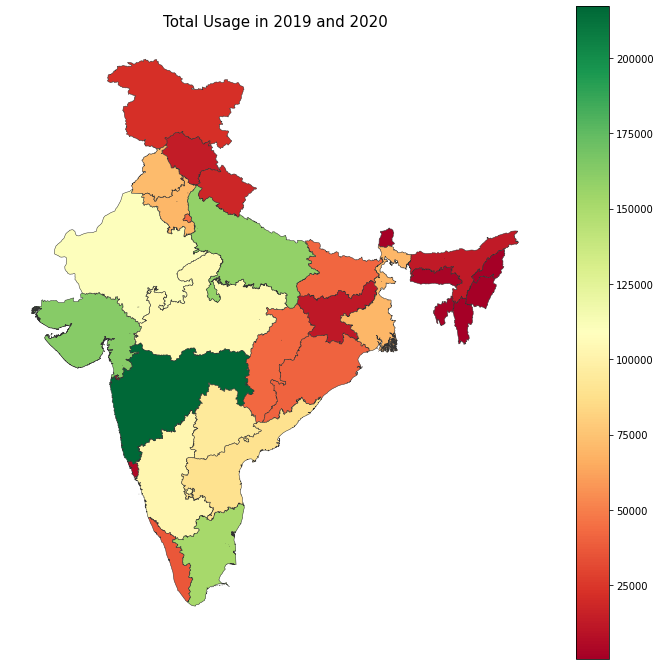

In [54]:
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Total Usage in 2019 and 2020',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Total Usage in 2019 and 2020', cmap='RdYlGn', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

# **Bubble Plot**

In [55]:
lpowerLonLat = pd.read_csv("/kaggle/input/state-wise-power-consumption-in-india/long_data_.csv")
print(lpowerLonLat.dtypes)

States        object
Regions       object
latitude     float64
longitude    float64
Dates         object
Usage        float64
dtype: object


In [56]:
lpowerLonLat["LongLat"] = lpowerLonLat["latitude"].astype(str) +" "+ lpowerLonLat["longitude"].astype(str)
lpowerLonLat.drop(["Regions","Dates", "States", "latitude", "longitude"],axis=1,inplace=True)
lpowerLonLat

,Usage,LongLat
0,119.9,31.51997398 75.98000281
1,130.3,28.45000633 77.01999101
2,234.1,26.44999921 74.63998124
3,85.8,28.6699929 77.23000403
4,313.9,27.59998069 78.05000565
...,...,...
16594,2.5,24.79997072 93.95001705
16595,5.8,25.57049217 91.8800142
16596,1.6,23.71039899 92.72001461
16597,2.1,25.6669979 94.11657019


In [57]:
dictLonLat = dict()
for i in lpowerLonLat.LongLat.unique():
    newDf = lpowerLonLat[(lpowerLonLat.LongLat == i)]
    sumUsage = newDf.Usage.sum()
    dictLonLat.update({i:sumUsage})
dictLonLat

{'31.51997398 75.98000281': 70996.2,
 '28.45000633 77.01999101': 69581.8,
 '26.44999921 74.63998124': 109877.0,
 '28.6699929 77.23000403': 41940.5,
 '27.59998069 78.05000565': 157960.3,
 '30.32040895 78.05000565': 18187.0,
 '31.10002545 77.16659704': 13363.8,
 '33.45 76.24': 22264.8,
 '30.71999697 76.78000565': 2083.2,
 '22.09042035 82.15998734': 42190.2,
 '22.2587 71.1924': 162488.90000000002,
 '21.30039105 76.13001949': 104766.40000000001,
 '19.25023195 73.16017493': 217079.8,
 '15.491997 73.81800065': 5579.900000000001,
 '20.26657819 73.0166178': 8264.6,
 '14.7504291 78.57002559': 88604.4,
 '18.1124 79.0193': 94065.3,
 '12.57038129 76.91999711': 102665.70000000001,
 '8.900372741 76.56999263': 36312.8,
 '12.92038576 79.15004187': 151271.5,
 '11.93499371 79.83000037': 3758.9,
 '25.78541445 87.4799727': 41829.2,
 '23.80039349 86.41998572': 11992.8,
 '19.82042971 85.90001746': 40473.7,
 '22.58039044 88.32994665': 69770.20000000001,
 '27.3333303 88.6166475': 648.5999999999999,
 '27.10039

In [58]:
longlatUsageDF = pd.DataFrame.from_dict(dictLonLat, orient="index")
longlatUsageDF.reset_index(level=0, inplace=True)
longlatUsageDF.rename(columns={'index': 'LongLat', 0:'Total Usage in 2019 and 2020'},inplace=True)
longlatUsageDF

,LongLat,Total Usage in 2019 and 2020
0,31.51997398 75.98000281,70996.2
1,28.45000633 77.01999101,69581.8
2,26.44999921 74.63998124,109877.0
3,28.6699929 77.23000403,41940.5
4,27.59998069 78.05000565,157960.3
5,30.32040895 78.05000565,18187.0
6,31.10002545 77.16659704,13363.8
7,33.45 76.24,22264.8
8,30.71999697 76.78000565,2083.2
9,22.09042035 82.15998734,42190.2


In [59]:
new = longlatUsageDF["LongLat"].str.split(" ", n = 1, expand = True)
longlatUsageDF["latitude"]= new[0]
longlatUsageDF["longitude"]= new[1]
longlatUsageDF.drop(["LongLat"],axis=1,inplace=True)
longlatUsageDF

,Total Usage in 2019 and 2020,latitude,longitude
0,70996.2,31.51997398,75.98000281
1,69581.8,28.45000633,77.01999101
2,109877.0,26.44999921,74.63998124
3,41940.5,28.6699929,77.23000403
4,157960.3,27.59998069,78.05000565
5,18187.0,30.32040895,78.05000565
6,13363.8,31.10002545,77.16659704
7,22264.8,33.45,76.24
8,2083.2,30.71999697,76.78000565
9,42190.2,22.09042035,82.15998734


In [60]:
longlatUsageDF["longitude"] = longlatUsageDF["longitude"].astype(str).astype(float)
longlatUsageDF["latitude"] = longlatUsageDF["latitude"].astype(str).astype(float)
longlatUsageDF

,Total Usage in 2019 and 2020,latitude,longitude
0,70996.2,31.519974,75.980003
1,69581.8,28.450006,77.019991
2,109877.0,26.449999,74.639981
3,41940.5,28.669993,77.230004
4,157960.3,27.599981,78.050006
5,18187.0,30.320409,78.050006
6,13363.8,31.100025,77.166597
7,22264.8,33.450000,76.240000
8,2083.2,30.719997,76.780006
9,42190.2,22.090420,82.159987


In [61]:
# import libraries
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

# import street map
street_map = gpd.read_file('../input/indian-gis-data/India States/Indian_states.shp')
street_map

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."
5,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627..."
6,Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650..."
7,Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20..."
8,Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14..."
9,Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20..."


In [62]:
# designate coordinate system
crs = {'init':'epsg:4326'}
# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(longlatUsageDF['longitude'], longlatUsageDF['latitude'])]
# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(longlatUsageDF,
 crs = crs,
 geometry = geometry)
geo_df

/opt/conda/lib/python3.7/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,Total Usage in 2019 and 2020,latitude,longitude,geometry
0,70996.2,31.519974,75.980003,POINT (75.98000 31.51997)
1,69581.8,28.450006,77.019991,POINT (77.01999 28.45001)
2,109877.0,26.449999,74.639981,POINT (74.63998 26.45000)
3,41940.5,28.669993,77.230004,POINT (77.23000 28.66999)
4,157960.3,27.599981,78.050006,POINT (78.05001 27.59998)
5,18187.0,30.320409,78.050006,POINT (78.05001 30.32041)
6,13363.8,31.100025,77.166597,POINT (77.16660 31.10003)
7,22264.8,33.450000,76.240000,POINT (76.24000 33.45000)
8,2083.2,30.719997,76.780006,POINT (76.78001 30.72000)
9,42190.2,22.090420,82.159987,POINT (82.15999 22.09042)


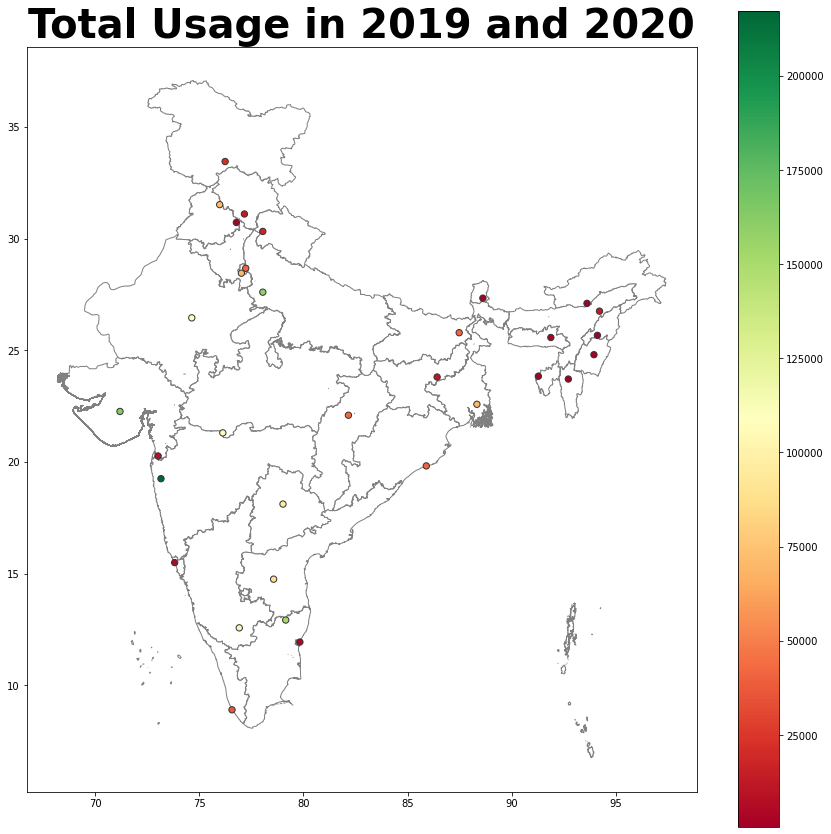

In [63]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,15))
# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=1, color="white", edgecolor='0.5')
# add geodataframe to axes
# assign ‘price’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
geo_df.plot(column='Total Usage in 2019 and 2020',ax=ax, legend=True,markersize=40, cmap='RdYlGn', linewidth=1, edgecolor='0.2')
# add title to graph
plt.title('Total Usage in 2019 and 2020', fontsize=40,fontweight='bold')
# set latitiude and longitude boundaries for map display
# show map
plt.show()

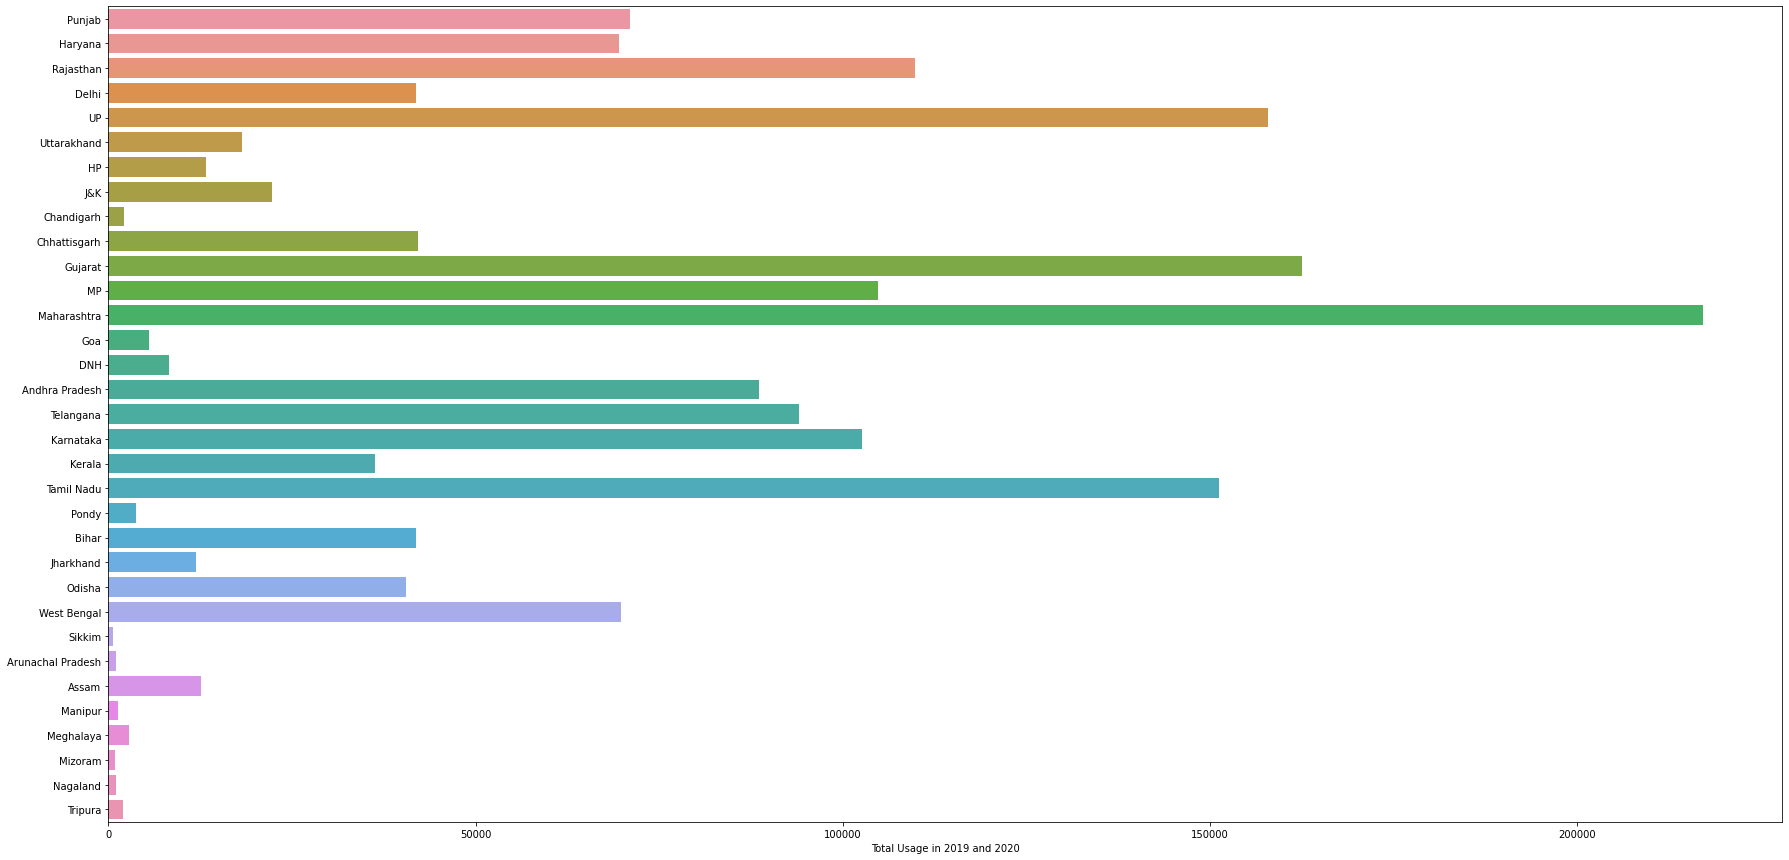

In [64]:
plt.figure(figsize=(30, 15))
sns.barplot(x="Total Usage in 2019 and 2020",y=stateWiseUsageDF.index,data=stateWiseUsageDF)
plt.show()
sns.set(font_scale=1.4)


In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [68]:
data = pd.read_csv('dataset_tk.csv')

In [69]:
data.head(2)

,Unnamed: 0,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,02-01-19 0:00,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
1,03-01-19 0:00,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6


In [70]:
data.rename(columns={"Unnamed: 0":"Date"},inplace=True)

In [71]:
# to convert string Date time into Python Date time object.
data['Date']=pd.to_datetime(data["Date"],dayfirst=True)
data["year"]=data["Date"].dt.year
data["month"]=data["Date"].dt.month
data["day"]=data["Date"].dt.day
data.drop(["Date"],axis=1,inplace=True)
data.head(2)


,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,Chhattisgarh,...,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura,year,month,day
0,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,78.7,...,2.1,21.7,2.7,6.1,1.9,2.2,3.4,2019,1,2
1,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,78.8,...,2.2,23.4,2.4,6.5,1.8,2.2,3.6,2019,1,3


In [72]:
data.columns

Index(['Punjab', 'Haryana', 'Rajasthan', 'Delhi', 'UP', 'Uttarakhand', 'HP',
       'J&K', 'Chandigarh', 'Chhattisgarh', 'Gujarat', 'MP', 'Maharashtra',
       'Goa', 'DNH', 'Andhra Pradesh', 'Telangana', 'Karnataka', 'Kerala',
       'Tamil Nadu', 'Pondy', 'Bihar', 'Jharkhand', 'Odisha', 'West Bengal',
       'Sikkim', 'Arunachal Pradesh', 'Assam', 'Manipur', 'Meghalaya',
       'Mizoram', 'Nagaland', 'Tripura', 'year', 'month', 'day'],
      dtype='object')

In [73]:
long_data=pd.read_csv("long_data_.csv")
long_data['Dates']=pd.to_datetime(long_data["Dates"],dayfirst=True)
long_data["year"]=long_data["Dates"].dt.year
long_data["month"]=long_data["Dates"].dt.month
long_data["day"]=long_data["Dates"].dt.day
long_data.drop(["latitude","longitude","Dates"],axis=1,inplace=True)

In [74]:
long_data.head()

,States,Regions,Usage,year,month,day
0,Punjab,NR,119.9,2019,1,2
1,Haryana,NR,130.3,2019,1,2
2,Rajasthan,NR,234.1,2019,1,2
3,Delhi,NR,85.8,2019,1,2
4,UP,NR,313.9,2019,1,2


In [75]:
long_data.head()

,States,Regions,Usage,year,month,day
0,Punjab,NR,119.9,2019,1,2
1,Haryana,NR,130.3,2019,1,2
2,Rajasthan,NR,234.1,2019,1,2
3,Delhi,NR,85.8,2019,1,2
4,UP,NR,313.9,2019,1,2


In [76]:
# creating empty dictionary to update the totalusage region wise in it in the form of key value pair
d1 = dict()
for i in (long_data['Regions'].unique()):
    a=long_data[(long_data["Regions"]==i)&(long_data["year"]==2020)]# grouping the scattered data of 2020 region wise
    b = a.Usage.sum()
    d1.update({i:b})
print("Regionwise data of 2020")
print(d1)
    

d2=dict()
for i in (long_data['Regions'].unique()):
    a=long_data[(long_data["Regions"]==i)&(long_data["year"]==2019)]# grouping the scattered data of 2019 region wise
    b = a.Usage.sum()
    d2.update({i:b})
print("Regionwise data of 2019")
print(d2)


Regionwise data of 2020
{'NR': 147559.8, 'WR': 155089.3, 'SR': 137883.39999999997, 'ER': 46799.4, 'NER': 6190.7}
Regionwise data of 2019
{'NR': 358694.8, 'WR': 385280.5, 'SR': 338795.20000000007, 'ER': 117915.1, 'NER': 15519.7}


## Regionwise Max and Min consumption in 2020

In [77]:
print(f" Maximum power consumed in 2020 is--> {d1[max(d1)]} by {max(d1)} region\n Minmum power consumed in 2020 is--> {d1[min(d1)]} by {min(d1)} region  ")

 Maximum power consumed in 2020 is--> 155089.3 by WR region
 Minmum power consumed in 2020 is--> 46799.4 by ER region  


#### Western region comprises of 
##### 1. Maharashtra is the financial capital of India and is second most industralised state.
#### 2. During fiscal year 2020, the electricity demand in the Indian state of Chhattisgarh increased by approximately 11 percent 


In [14]:
# Analysis: In terms of regional demand, while there has been an improvement in electricity consumption in the northern, western
#and eastern regions in September’20 from a month ago, the southern and north-eastern regions witnessed a decline. The
#western region, which is home to the most industrialised states of the country registered a 13% monthly increase in power
#consumption, affirming to the higher activity here. The northern and eastern regions saw electricity consumption increase
#by 8% and 4% respectively from that in August’20. The lower power consumption in the southern states (2.4% lower than
#in August’20) indicates that industrial activity here has been lacklustre despite the easing of the lockdown and restrictions. 

### Visualizing the consumption pattern

In [78]:
# creating the table out of dict1 and dict2
tab1=pd.DataFrame.from_dict(d1,orient="index")
tab2=pd.DataFrame.from_dict(d2,orient="index")

In [79]:
tab1.head()


,0
NR,147559.8
WR,155089.3
SR,137883.4
ER,46799.4
NER,6190.7


In [80]:
tab2.head()

,0
NR,358694.8
WR,385280.5
SR,338795.2
ER,117915.1
NER,15519.7


In [81]:
# Renaming the columns of table1

In [82]:
tab1.rename(columns={0:"Consumption(2020)"},inplace=True)

In [83]:
tab1.head()

,Consumption(2020)
NR,147559.8
WR,155089.3
SR,137883.4
ER,46799.4
NER,6190.7


In [84]:
tab2.rename(columns={0:"Consumption(2019)"},inplace=True)
tab2.head()

,Consumption(2019)
NR,358694.8
WR,385280.5
SR,338795.2
ER,117915.1
NER,15519.7


In [85]:
plt.figure(figsize=(10, 5))


<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

In [86]:
usagein2020=dict()

for i in (long_data.States.unique()):
    a=long_data[(long_data["States"]==i)&(long_data["year"]==2020)]
    b=a.Usage.sum()
    usagein2020.update({i:b})
# print(usage2020)
# print("***************2019****************")
usagein2019=dict()
for i in (long_data.States.unique()):
    a=long_data[(long_data["States"]==i)&(long_data["year"]==2019)]
    b=a.Usage.sum()
    usagein2019.update({i:b})

In [87]:
Punjabusagein2019=dict()
l1=['Punjab','Telangana','Andhra Pradesh','Tamil Nadu','Karnataka']
for i in l1:
    d1=long_data[(long_data.States==i)&(long_data.year==2019)]
    totalusage=d1.Usage.sum()
    Punjabusagein2019.update({i:totalusage})
print(Punjabusagein2019)
    


{'Punjab': 119.9, 'Telangana': 204.2, 'Andhra Pradesh': 164.6, 'Tamil Nadu': 268.3, 'Karnataka': 206.3}


In [88]:
Punjabusagein2019

{'Punjab': 119.9,
 'Telangana': 204.2,
 'Andhra Pradesh': 164.6,
 'Tamil Nadu': 268.3,
 'Karnataka': 206.3}

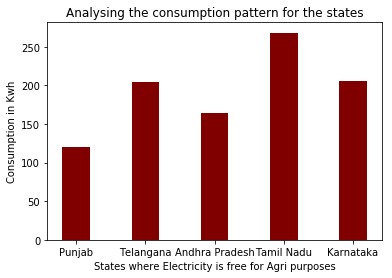

In [35]:
keys = Punjabusagein2019.keys()
values = Punjabusagein2019.values()
plt.bar(keys, values,color ='maroon',width = 0.4)
plt.xlabel("States where Electricity is free for Agri purposes")
plt.ylabel("Consumption in Kwh")
plt.title("Analysing the consumption pattern for the states")
plt.show()

#### Analysis: Though the electricity is free for Agricultural purposes in the above 5 states, the Southern states outperform the only Northern state i.e. Punjab in terms of electricity consumption.

In [36]:
tab3=pd.DataFrame.from_dict(usagein2020,orient="index")
tab4=pd.DataFrame.from_dict(usagein2019,orient="index")

In [37]:
tab3.rename(columns={0:'Total usage in 2020'},inplace=True)
tab4.rename(columns={0:'Total usage in 2019'},inplace=True)

In [38]:
tab3.sort_values(by=['Total usage in 2020'],ascending=False,inplace=True)
tab4.sort_values(by=['Total usage in 2019'],ascending=False,inplace=True)

In [39]:
print('Top 10 states that consume maximum power in 2020')
tab3.head(10)

Top 10 states that consume maximum power in 2020


,Total usage in 2020
Punjab,0.0
Sikkim,0.0
Tamil Nadu,0.0
Pondy,0.0
Bihar,0.0
Jharkhand,0.0
Odisha,0.0
West Bengal,0.0
Arunachal Pradesh,0.0
Haryana,0.0


In [40]:
print('Top 10 states that consume maximum power in 2019')
tab4.head(10)

Top 10 states that consume maximum power in 2019


,Total usage in 2019
Maharashtra,428.6
Gujarat,319.5
UP,313.9
Tamil Nadu,268.3
MP,253.0
Rajasthan,234.1
Karnataka,206.3
Telangana,204.2
Andhra Pradesh,164.6
Haryana,130.3


Top 10 states that consumed maximum power in 2019


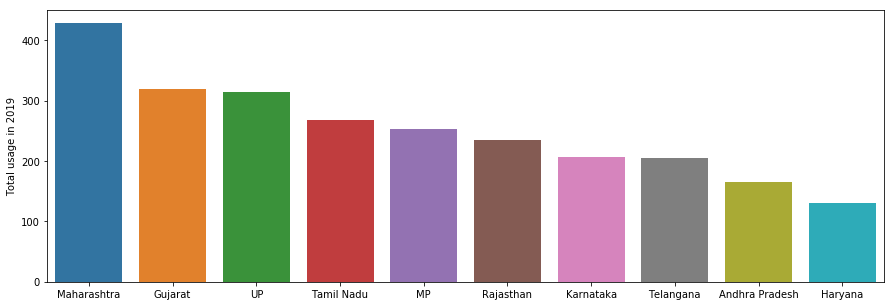

In [41]:
tab5=tab4.head(10)
plt.figure(figsize=(15, 5))
sns.barplot(y="Total usage in 2019",x=tab5.index,data=tab5)
print("Top 10 states that consumed maximum power in 2019")

#### Let's Understand the Consumption pattern

### 4. Finding the states which consume least power yearly

In [43]:
print('Top 10 states that consumed least power in 2020')
tab7=tab3.tail(10)
tab7

Top 10 states that consumed least power in 2020


,Total usage in 2020
Gujarat,0.0
Chhattisgarh,0.0
Chandigarh,0.0
J&K,0.0
HP,0.0
Uttarakhand,0.0
UP,0.0
Delhi,0.0
Rajasthan,0.0
NaN,0.0


In [45]:
print('Top 10 states that consumed least power in 2020')
tab8=tab4.tail(10)
tab8

Top 10 states that consumed least power in 2020


,Total usage in 2019
Pondy,6.3
Meghalaya,6.1
Chandigarh,5.0
Tripura,3.4
Manipur,2.7
Nagaland,2.2
Arunachal Pradesh,2.1
Sikkim,2.0
Mizoram,1.9
NaN,0.0


Top 10 states that consume least power in 2019


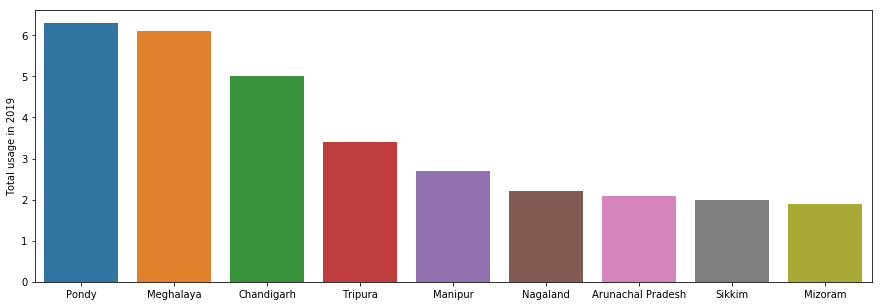

In [46]:
plt.figure(figsize=(15, 5))
sns.barplot(y="Total usage in 2019",x=tab8.index,data=tab8)
print("Top 10 states that consume least power in 2019")

### Understanding how COVID-19 has impacted the consumption pattern in 2019 and 2020

In [47]:
# Monthwise total consumption in 2019, storing it in dictionary dict2019
dict2019=dict()
for i in range(1,13):
    k=long_data[(long_data["month"]==i)&(long_data["year"]==2019)]
    n=k["Usage"].sum()
    dict2019.update({i:n})
print(dict2019)

{1: 101305.6, 2: 87276.4, 3: 99833.6, 4: 103150.79999999999, 5: 101728.0, 6: 96775.59999999999, 7: 118600.3, 8: 105273.9, 9: 102346.70000000001, 10: 102442.6, 11: 93288.9, 12: 104182.9}


In [48]:
# Monthwise total consumption in 2020, storing it in dictionary dict2020
dict2020=dict()
for i in range(1,13):
    k=long_data[(long_data["month"]==i)&(long_data["year"]==2020)]
    n=k["Usage"].sum()
    dict2020.update({i:n})
print(dict2020)

{1: 85319.2, 2: 76385.4, 3: 77012.1, 4: 78242.3, 5: 53559.3, 6: 15661.199999999997, 7: 17130.7, 8: 18134.4, 9: 17178.4, 10: 18536.600000000002, 11: 18082.0, 12: 18281.0}


In [49]:
# List 1 ----> For 2019 consumption data
# List2 -----> For 2020 consumption data

list1 = list(dict2019.values())
list2 = list(dict2020.values())

In [50]:
month=["jan","feb",'march',"april","may","june","july","aug","sep","oct","nov","dec"]

In [51]:
A=max(list1)
B=list1.index(A)
C=month[B]

x=max(list2)
y=list2.index(x)
z=month[y]

In [52]:
print(f"maximum rise in consumption is in month of {C} 2019")
print(f"maximum rise in consumption is in month of {z} 2020")


maximum rise in consumption is in month of july 2019
maximum rise in consumption is in month of jan 2020


##### Visualizng the Maximum  Consumption in 2019 and 2020

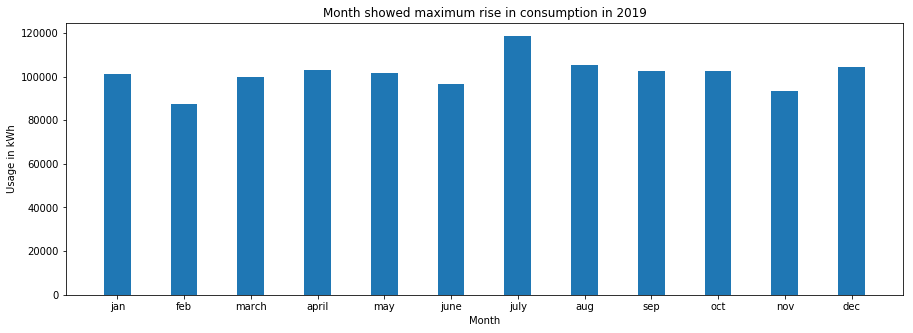

In [53]:
plt.figure(figsize=(15,5))
plt.bar(month,list1,width=0.4)

plt.ylabel('Usage in kWh')
plt.xlabel('Month')
plt.title('Month showed maximum rise in consumption in 2019')
#plt.text(list1,list1[values])
plt.show()

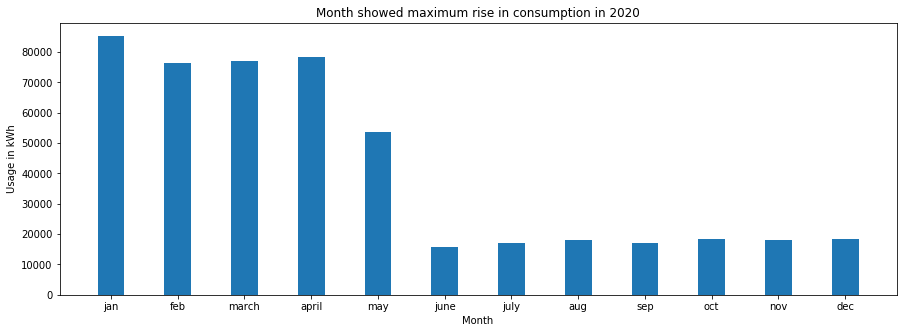

In [54]:
plt.figure(figsize=(15,5))
plt.bar(month,list2,width=0.4)

plt.ylabel('Usage in kWh')
plt.xlabel('Month')
plt.title('Month showed maximum rise in consumption in 2020')
plt.show()

In [55]:
print(f"Total consumption in March-May 2019 is {list1[2]+list1[3]+list1[4]}Kwh ")
print(f"Total consumption in March-May 2020 is {list2[2]+list2[3]+list2[4]}Kwh")

Total consumption in March-May 2019 is 304712.4Kwh 
Total consumption in March-May 2020 is 208813.7Kwh


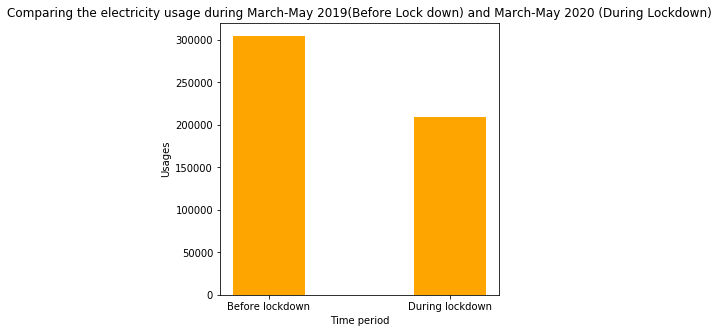

In [56]:
num1=float((list1[2]+list1[3]+list1[4]))
num2=float((list2[2]+list2[3]+list2[4]))
list3=[]
list4=[]
list4.append(num1)
list4.append(num2)
list3.append('Before lockdown')
list3.append('During lockdown')


plt.figure(figsize = (5, 5))
plt.bar(list3, list4, color ='orange',
        width = 0.4)
 
plt.xlabel("Time period")
plt.ylabel("Usages")
plt.title("Comparing the electricity usage during March-May 2019(Before Lock down) and March-May 2020 (During Lockdown)")
plt.show()